In [12]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250
import matplotlib 
from matplotlib import pylab as plt

In [31]:
import os

dirct = os.path.abspath(os.path.join(cwd,os.pardir))

In [35]:
df = pd.read_csv(dirct +'/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exclude Customer ID
df = df.loc[:, df.columns != 'customerID'] 

In [36]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# number of rows
print(df.shape[0]) 

7043


In [6]:
# number of columns
print(df.shape[1]) 

20


In [7]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [8]:
# Missing Values 

## Change the type of Feature TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
print(df['TotalCharges'].describe())

print(df.isnull().sum())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# Exploratory Data Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


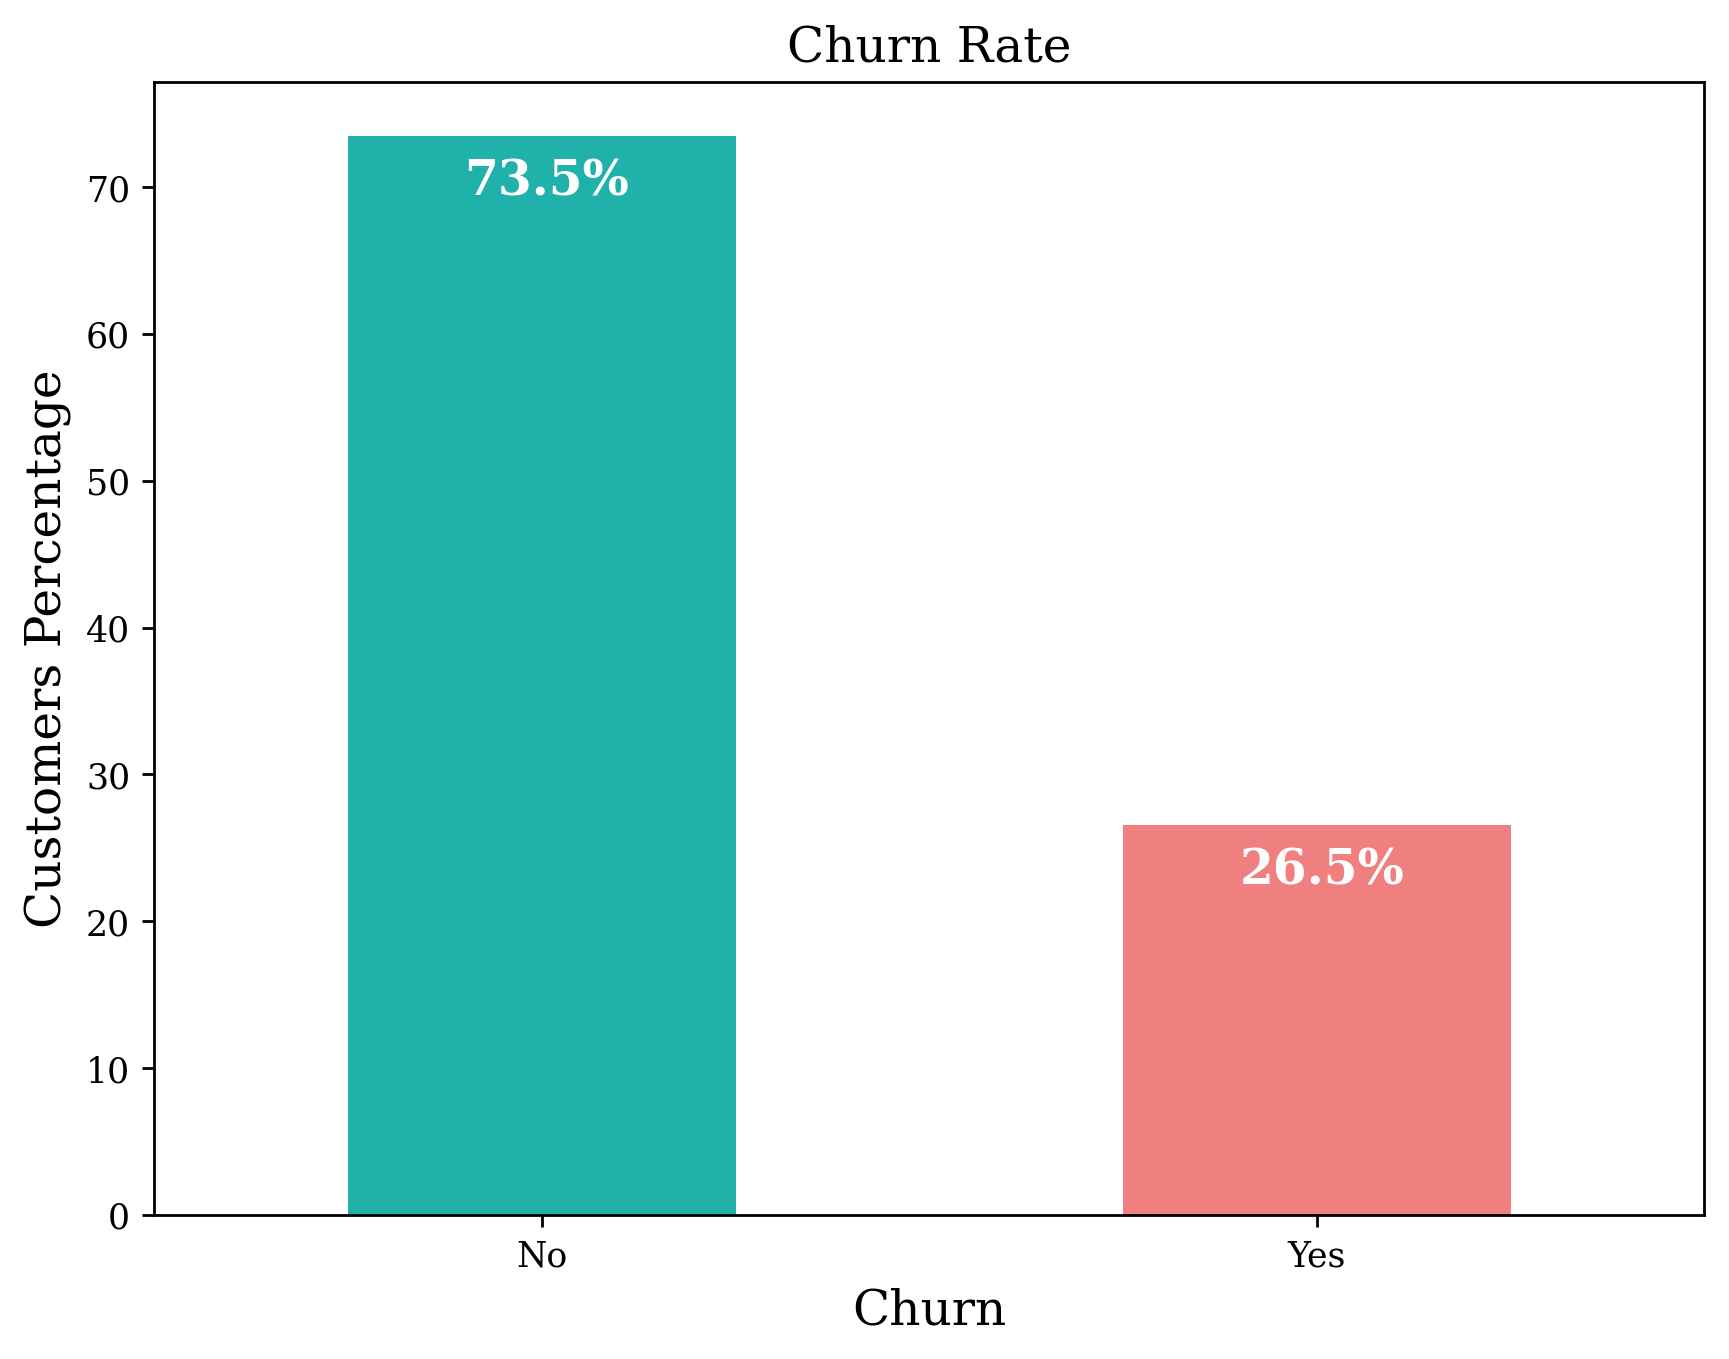

In [37]:
# Target Variable 


print(df['Churn'].value_counts())


fig = plt.figure()
colors = ['lightseagreen','lightcoral']
plt.rcParams["font.family"] = 'serif'
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))

ax.set_ylabel('Customers Percentage',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

    
plt.savefig(dirct +'/figures/Churn_Rate.png', bbox_inches='tight')

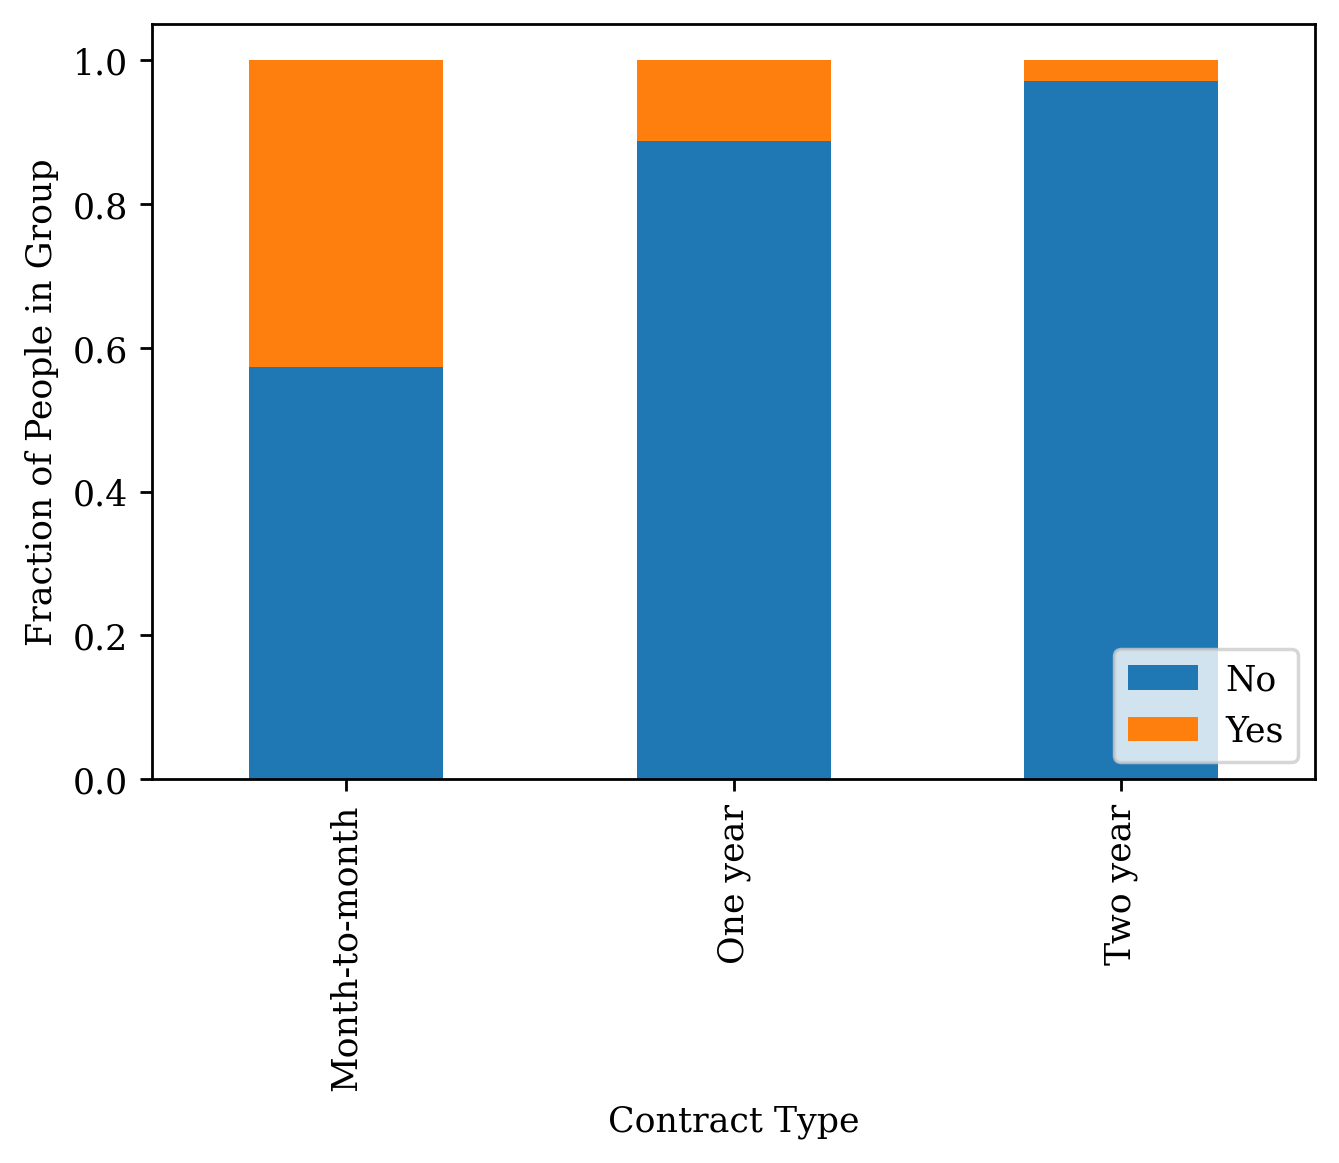

In [38]:
# Churn by Contract Type

count_matrix = df.groupby(['Contract','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Group')
plt.xlabel('Contract Type')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/ContractType_Churn.png', bbox_inches='tight')
plt.show()


    

In [66]:
# df.isnull().sum()

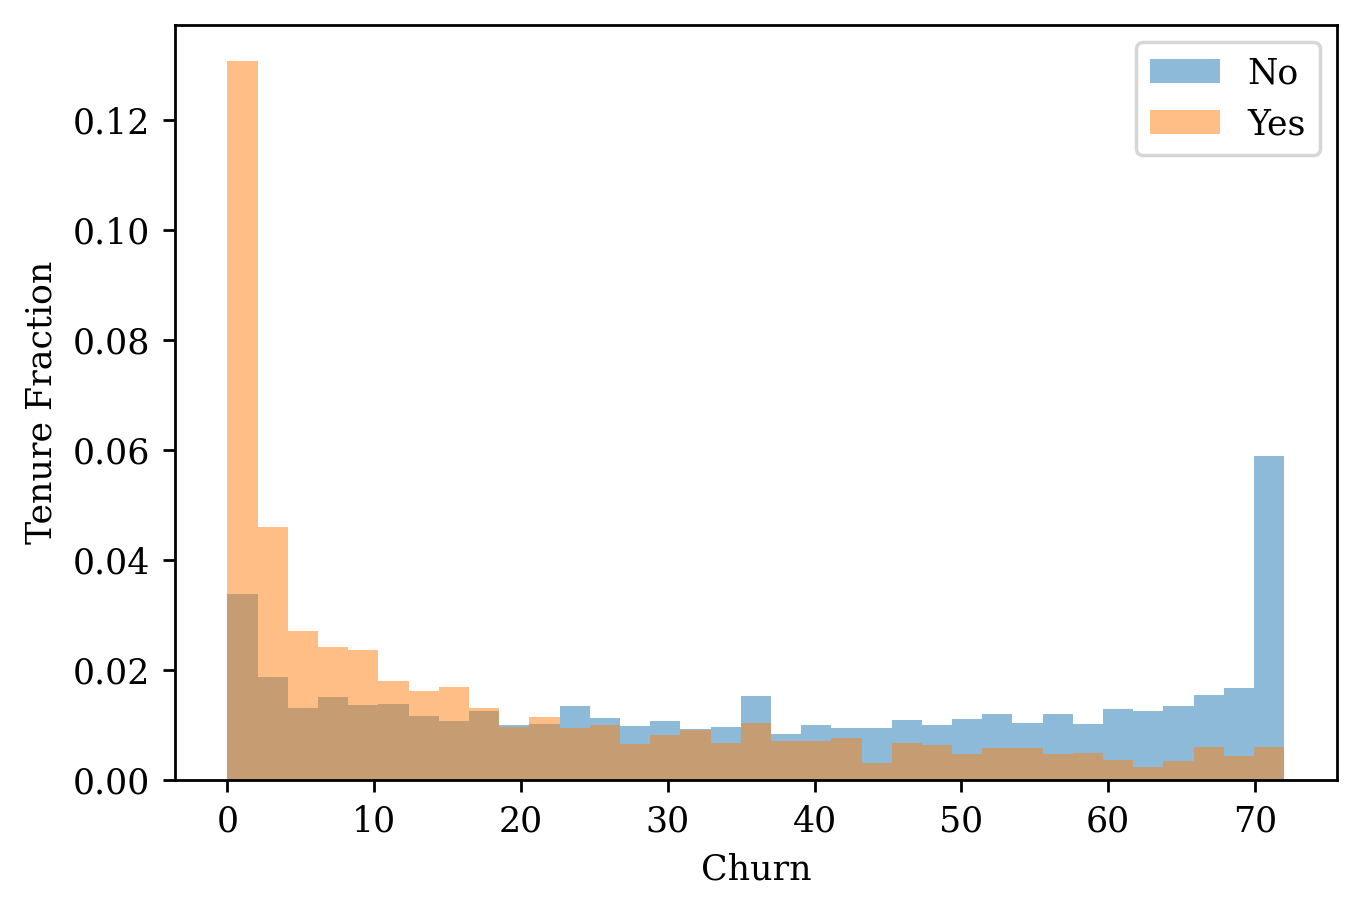

In [39]:
df['tenure'].describe()

categories = df['Churn'].unique()
bin_range = (df['tenure'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['tenure'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Tenure Fraction')
plt.xlabel('Churn')
plt.savefig(dirct +'/figures/tenure_Churn.png', bbox_inches='tight')
plt.show()

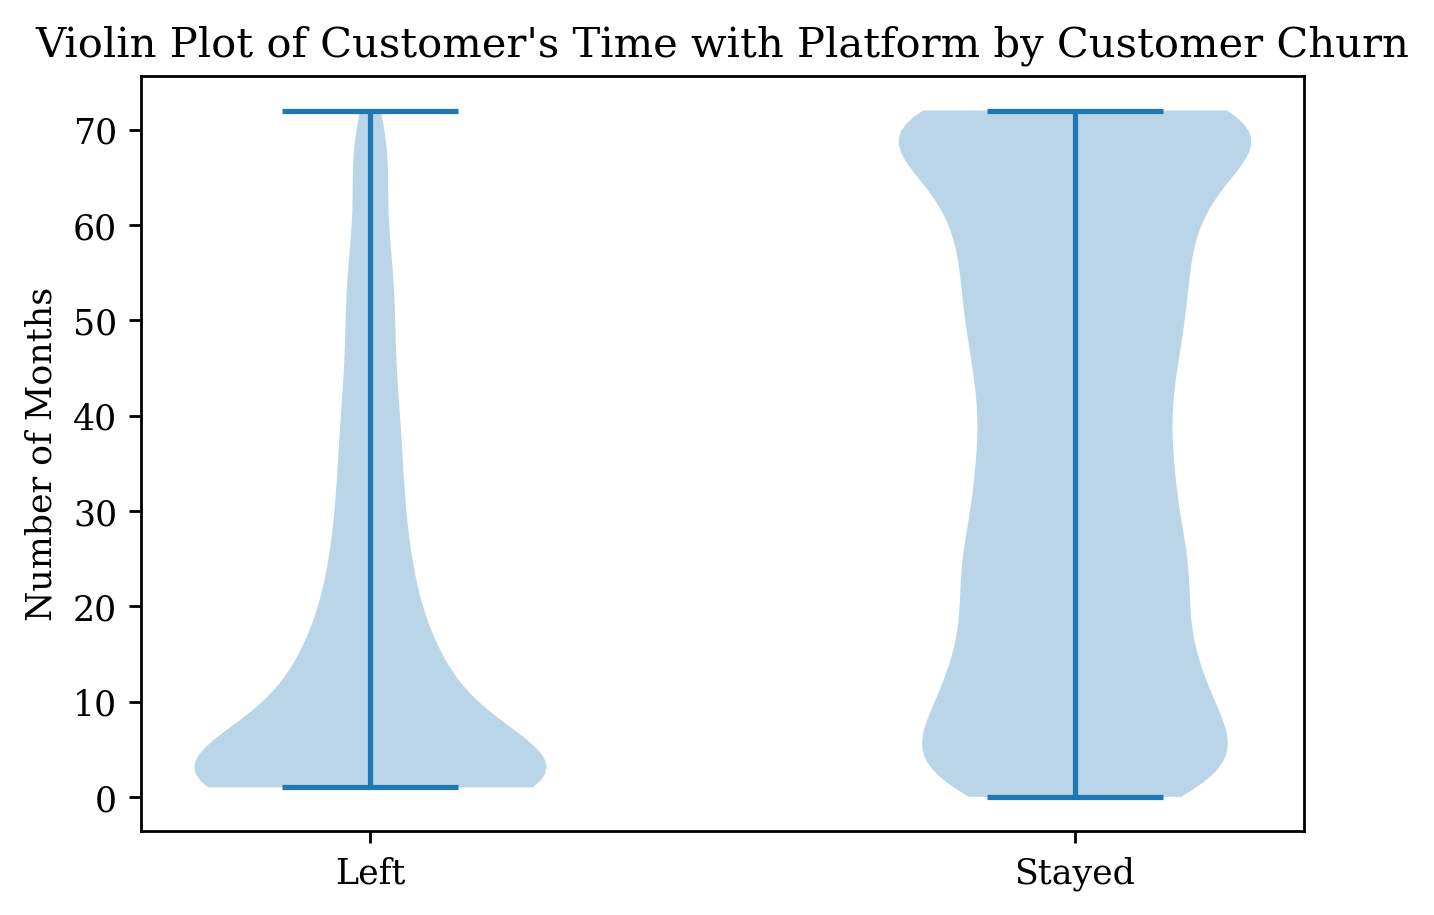

In [40]:
dataset = [df[df['Churn']=='Yes']['tenure'].values,
           df[df['Churn']=='No']['tenure'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Left','Stayed'])
plt.ylabel('Number of Months')
plt.title("Violin Plot of Customer's Time with Platform by Customer Churn")
plt.savefig(dirct +'/figures/Violin_tenure_Churn.png', bbox_inches='tight')
plt.show()

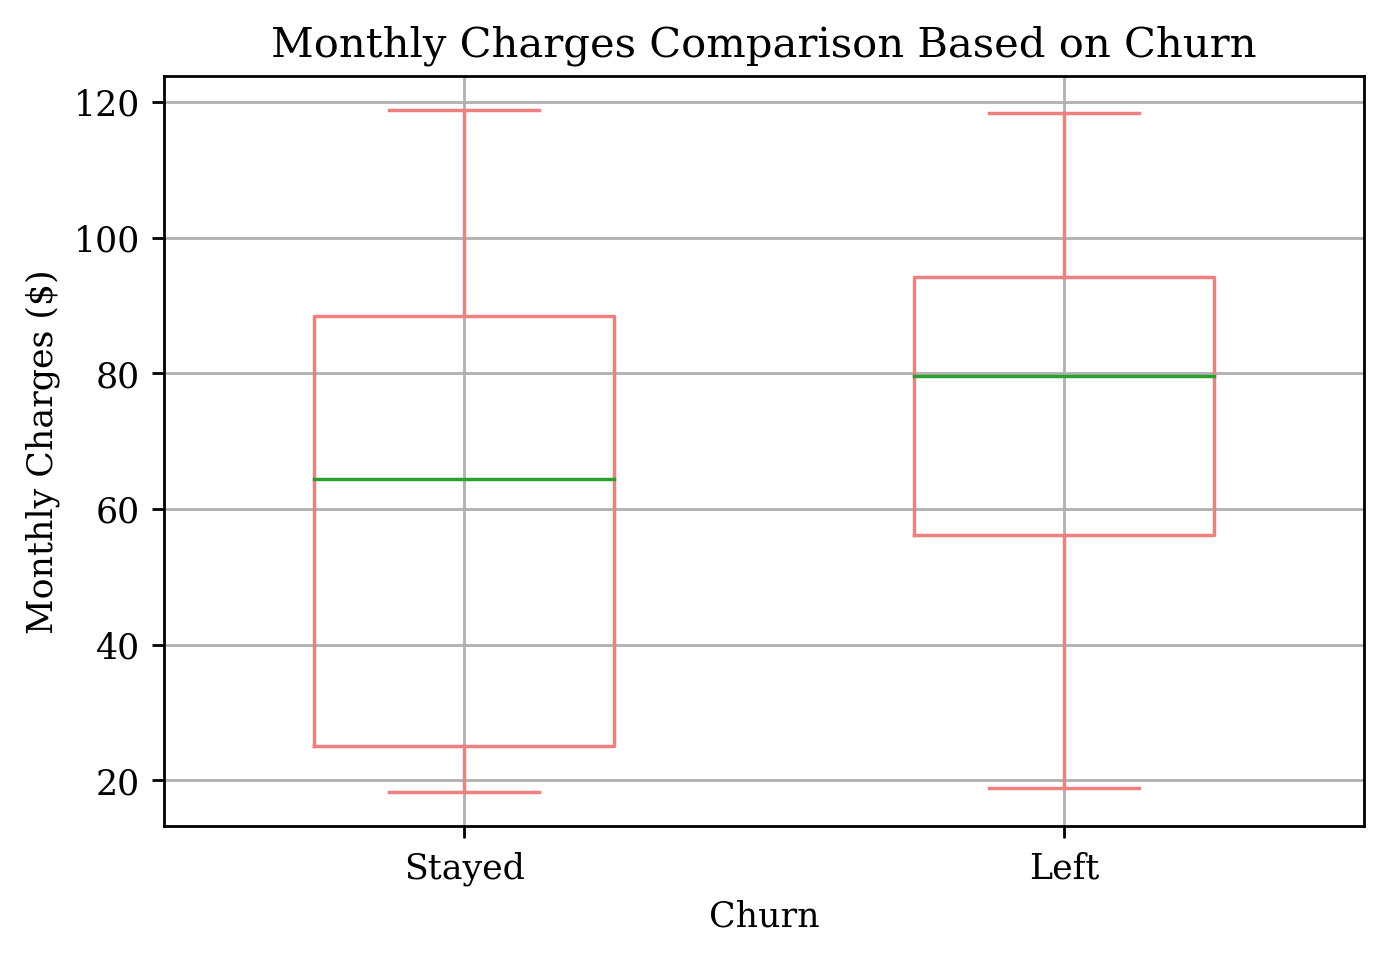

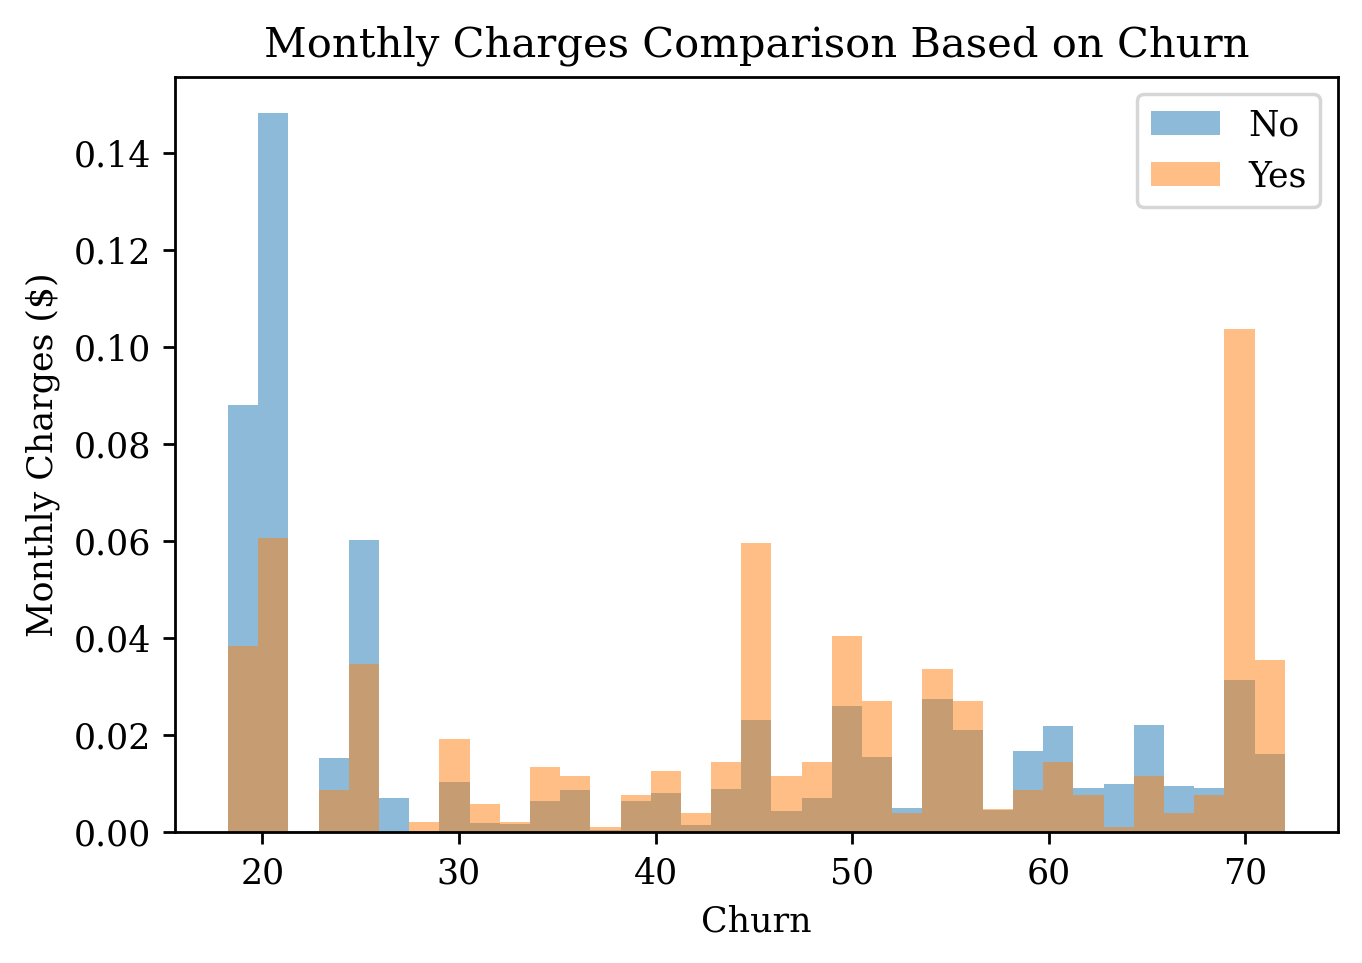

In [41]:
df['MonthlyCharges'].describe()

df[['MonthlyCharges','Churn']].boxplot(by='Churn',widths=(0.5,0.5),
                                       boxprops=dict(color=colors[1]), capprops=dict(color=colors[1]),whiskerprops=dict(color=colors[1]))
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.xticks([1,2],['Stayed','Left'])
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/boxplot_MonthlyCharges_Churn.png', bbox_inches='tight')
plt.show()



categories = df['Churn'].unique()
bin_range = (df['MonthlyCharges'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['MonthlyCharges'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/hstgm_MonthlyCharges_Churn.png', bbox_inches='tight')
plt.show()

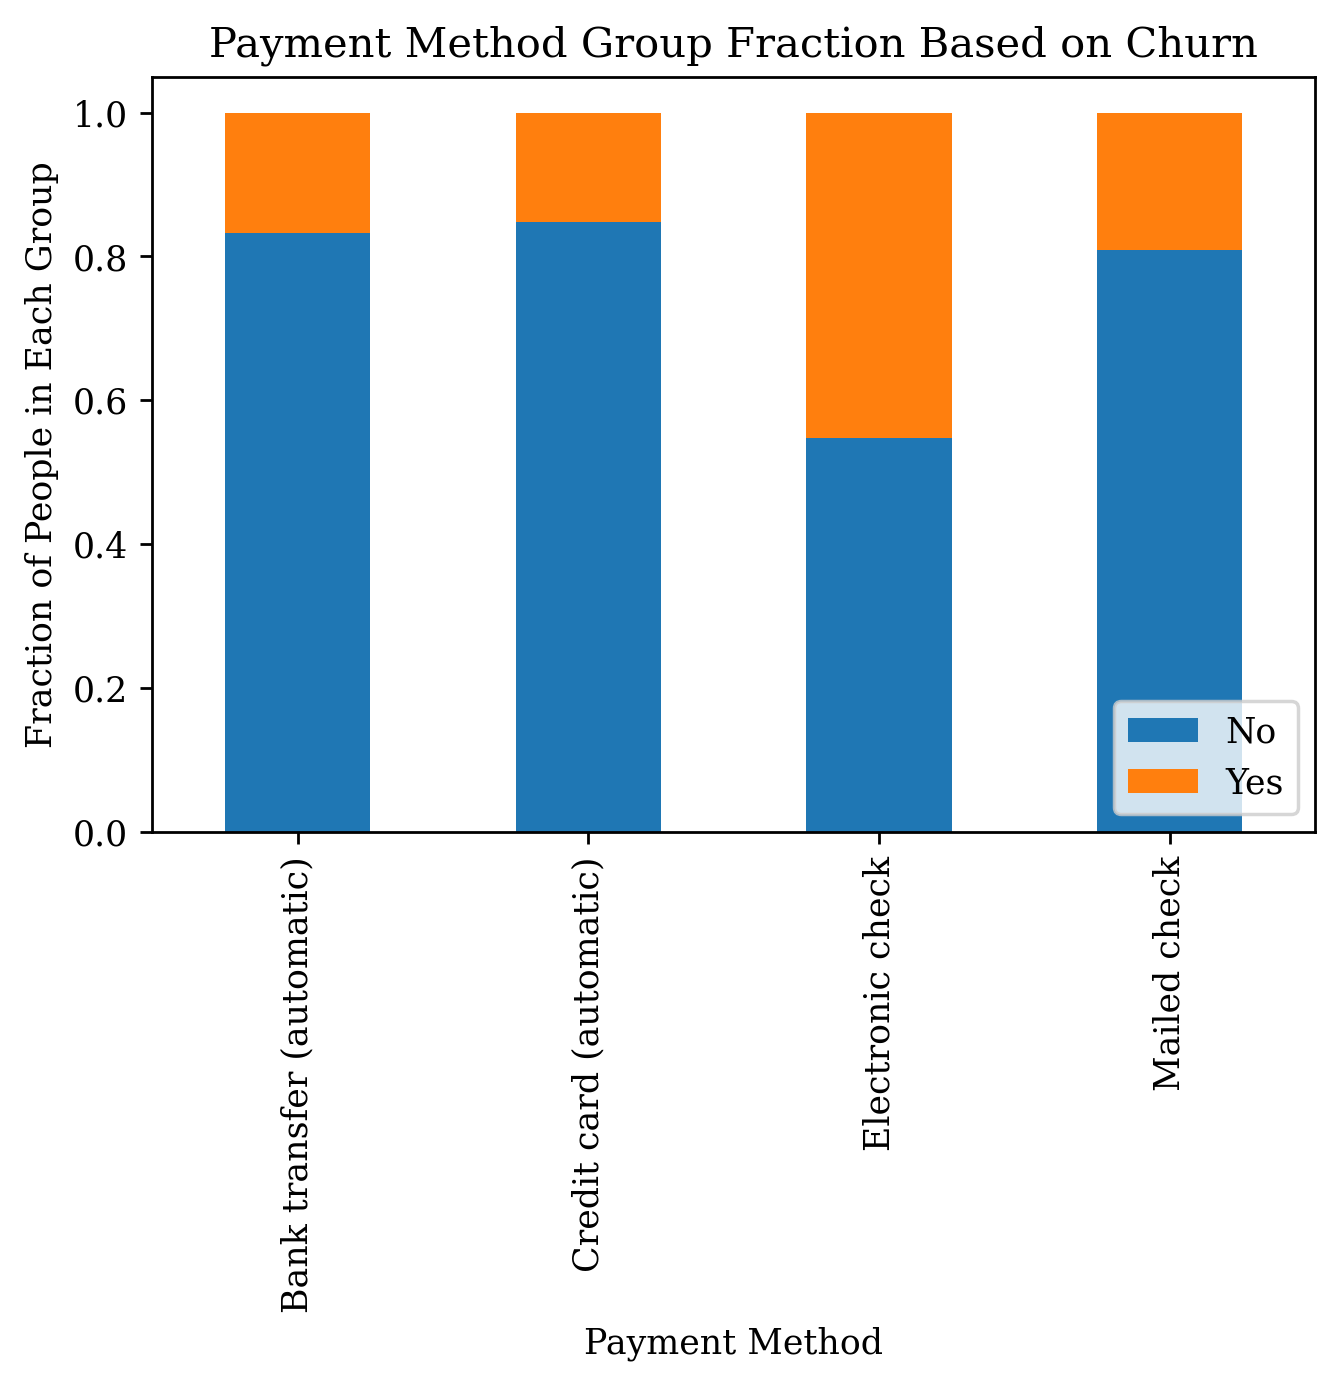

In [42]:
# Churn by Payment Method 

count_matrix = df.groupby(['PaymentMethod','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Each Group')
plt.xlabel('Payment Method')
plt.title('Payment Method Group Fraction Based on Churn')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/paymentMethod_Churn.png', bbox_inches='tight')
plt.show()
    

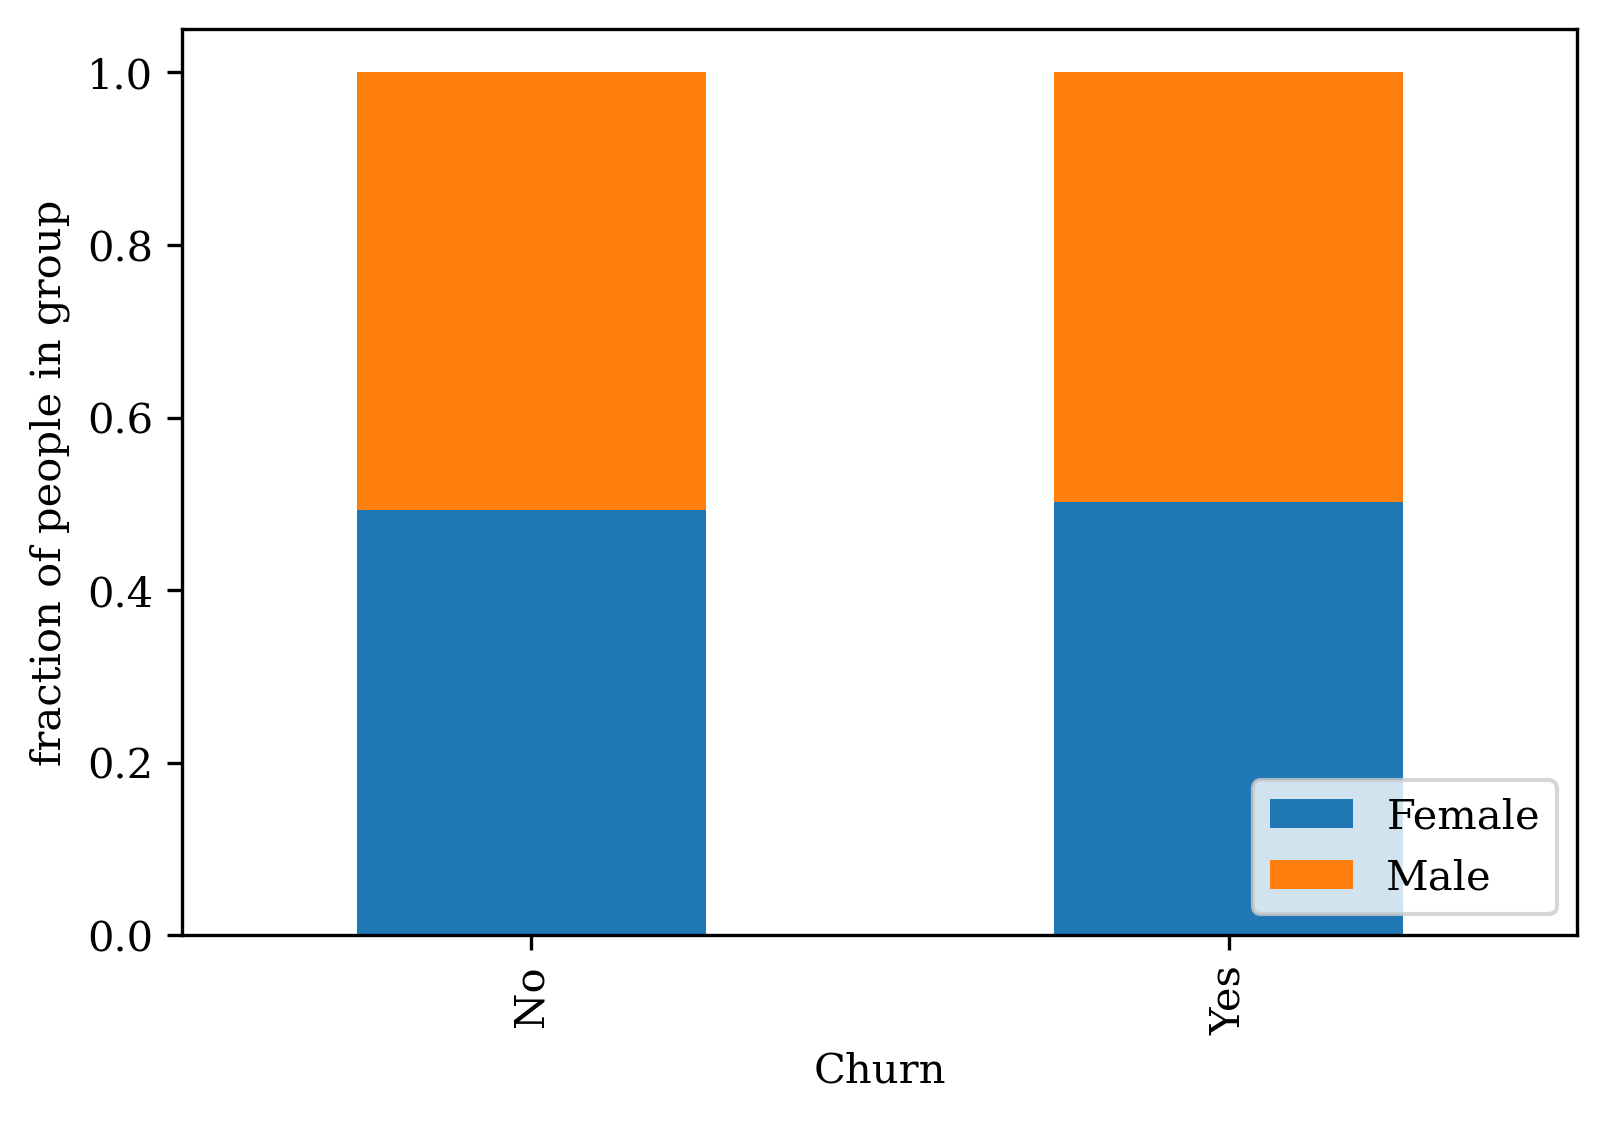

Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


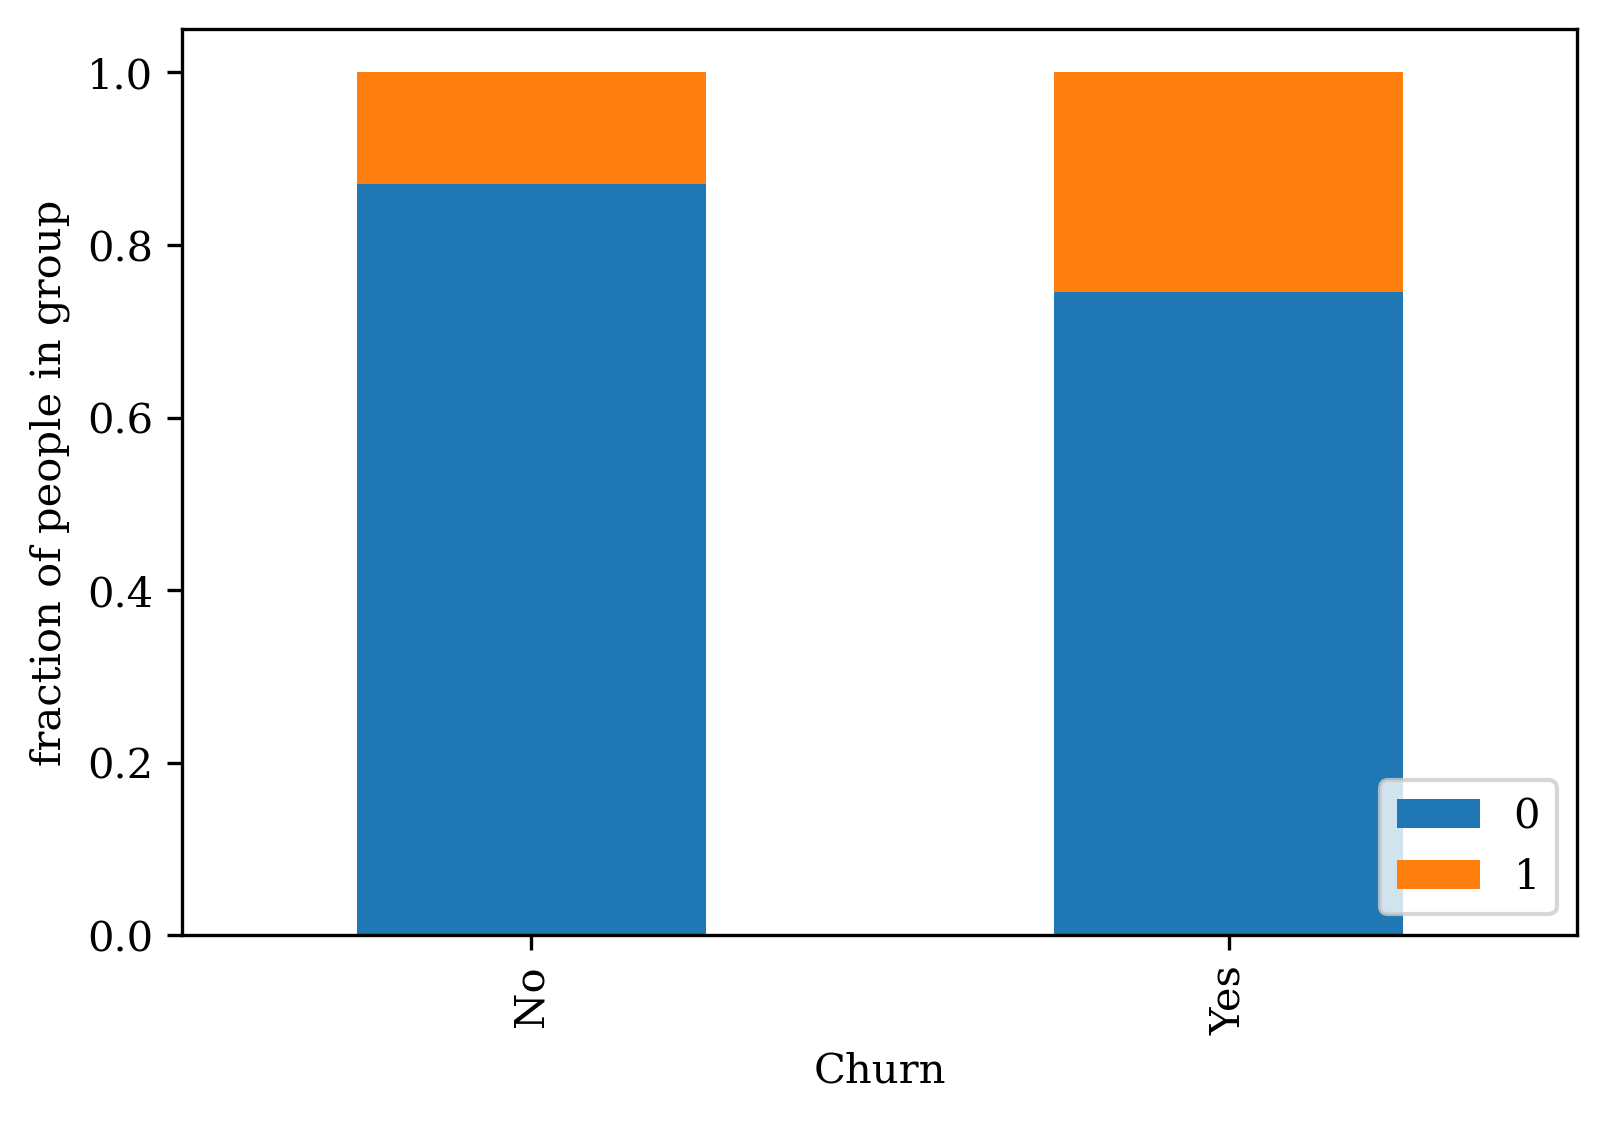

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64


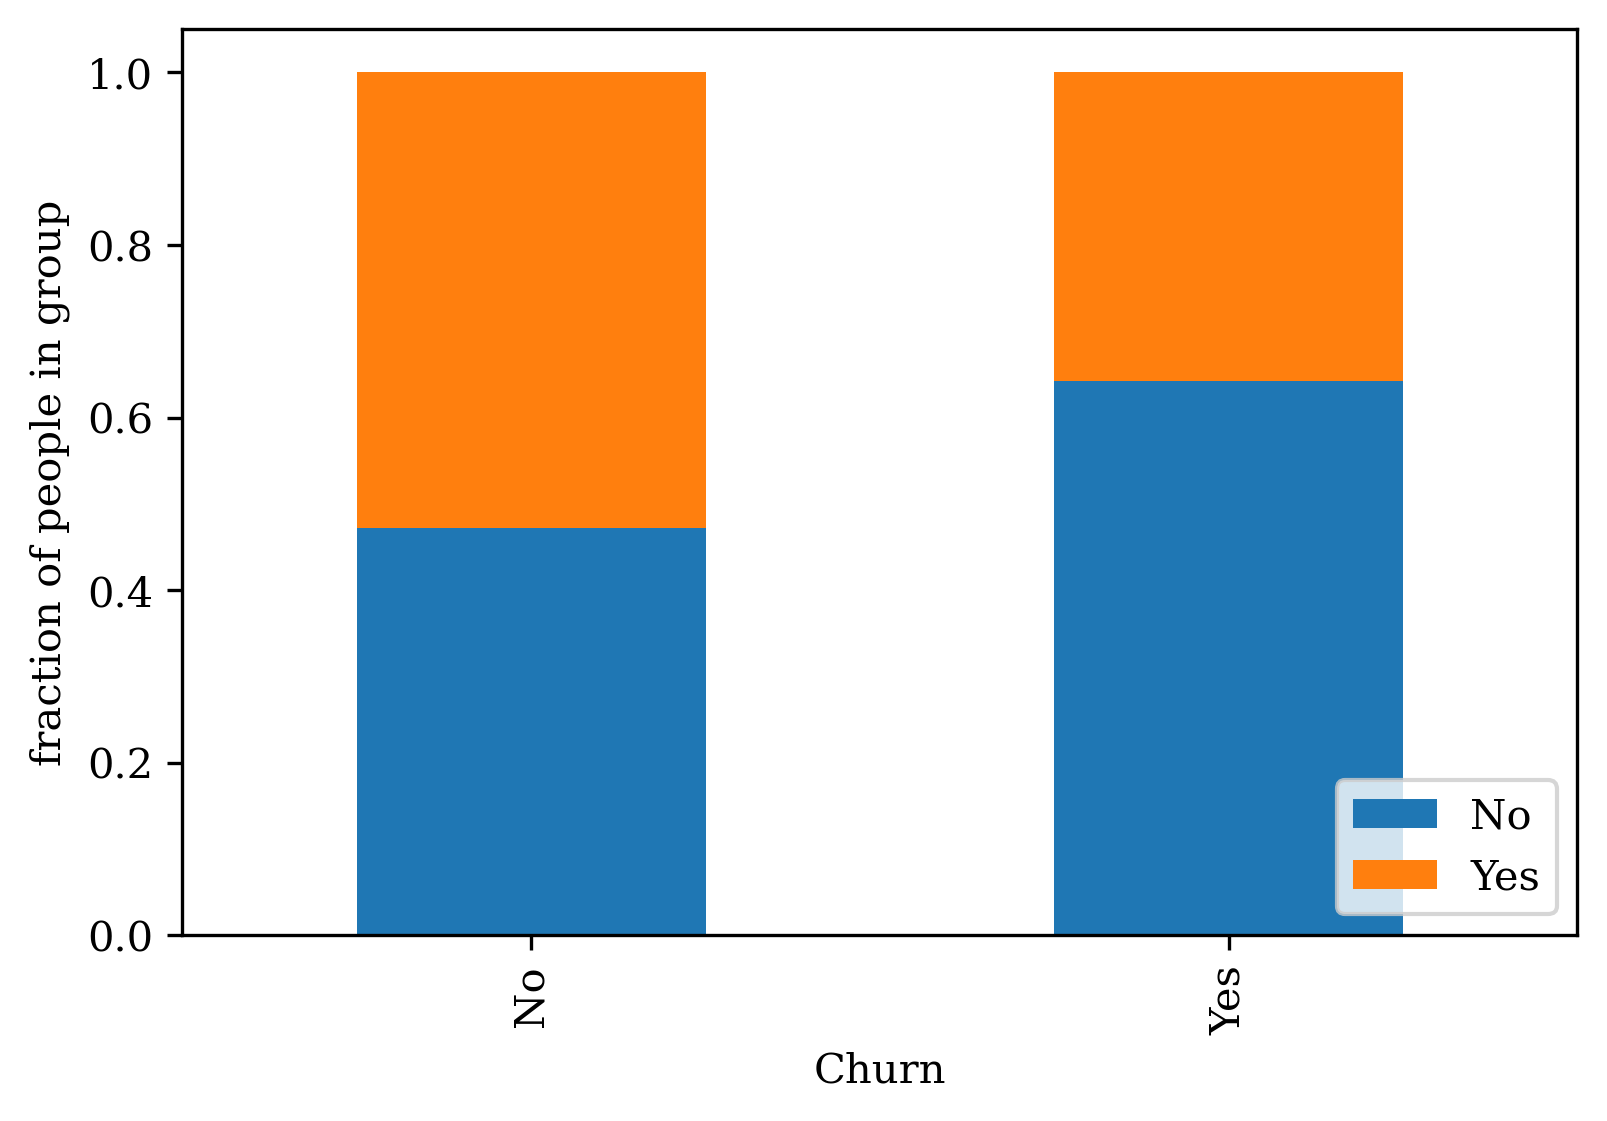

No     3641
Yes    3402
Name: Partner, dtype: int64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64


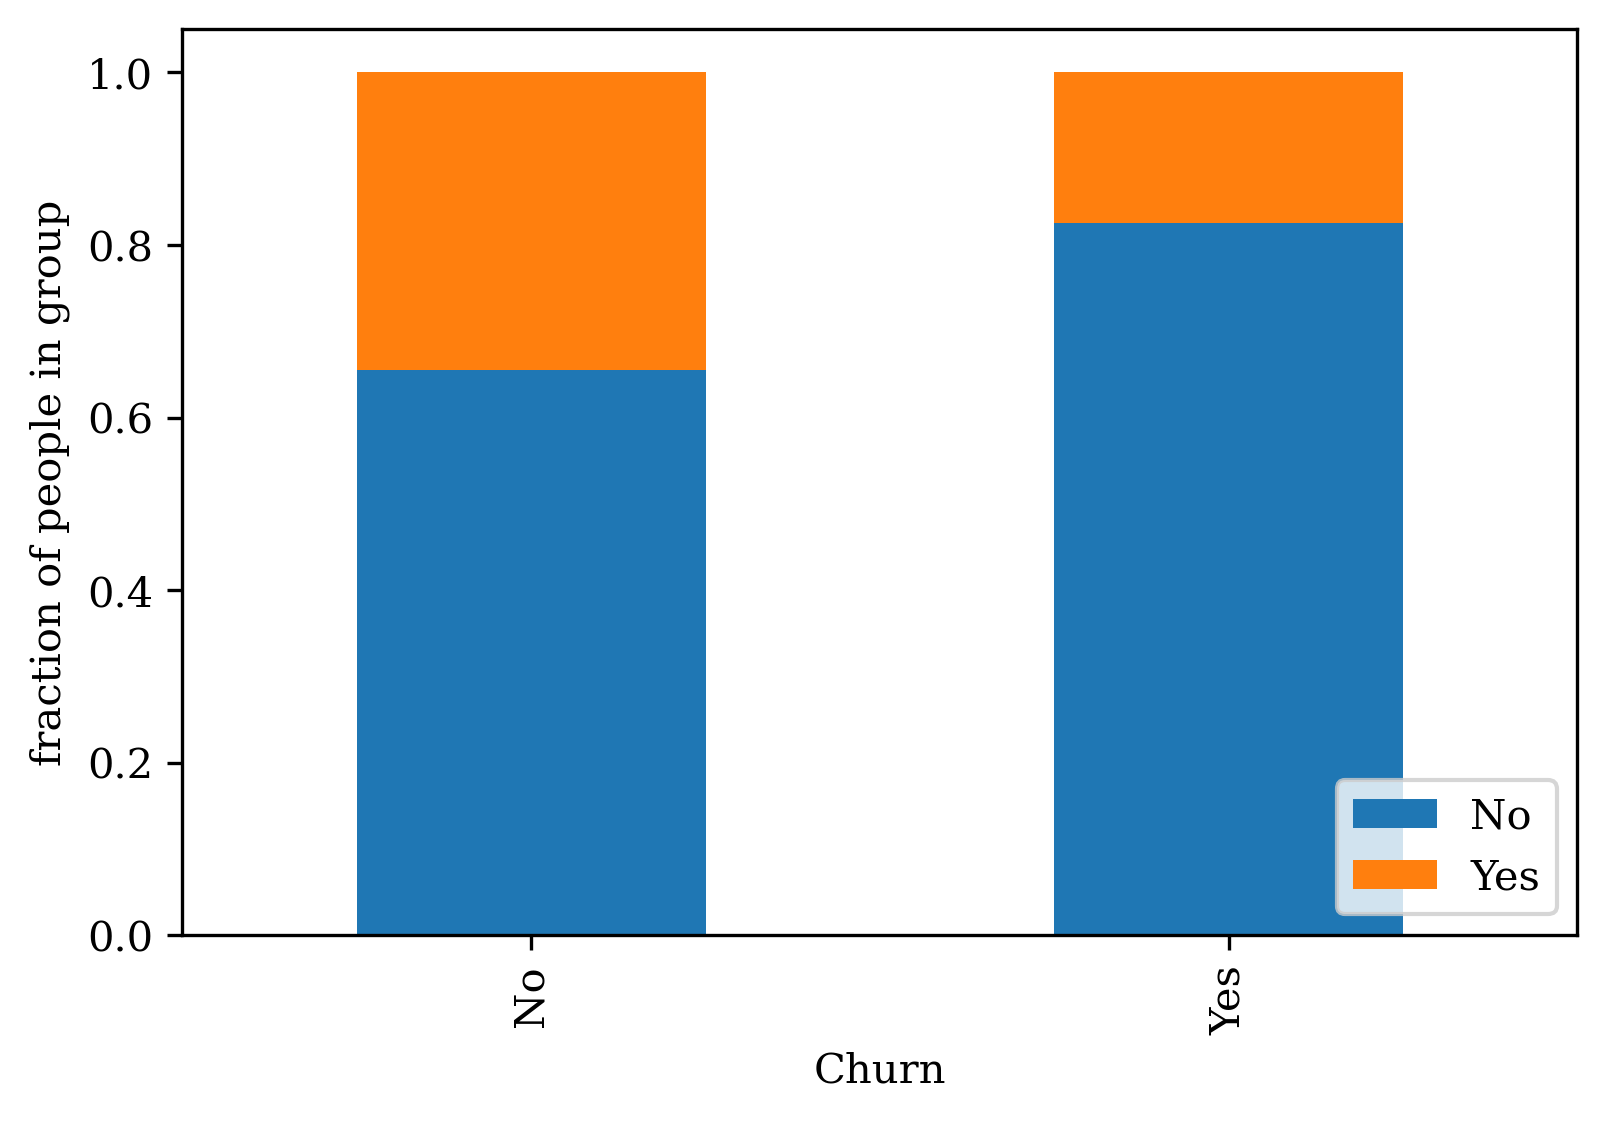

No     4933
Yes    2110
Name: Dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


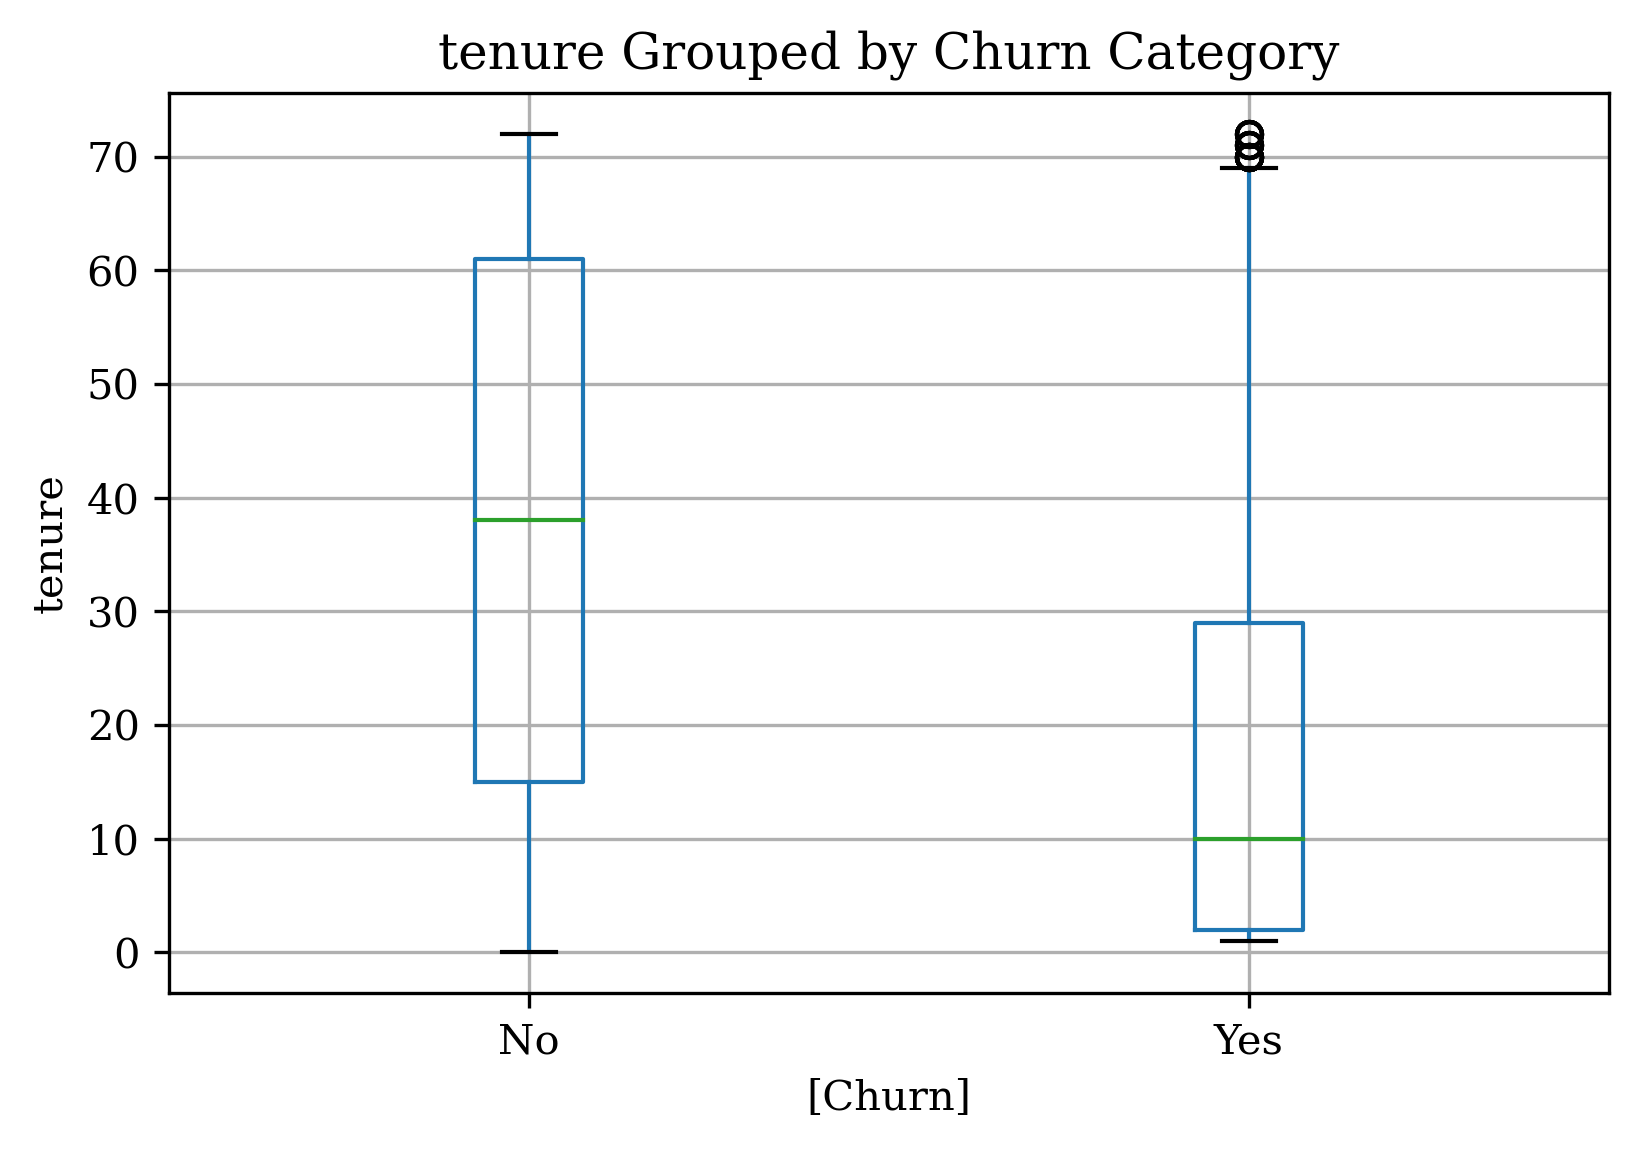

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


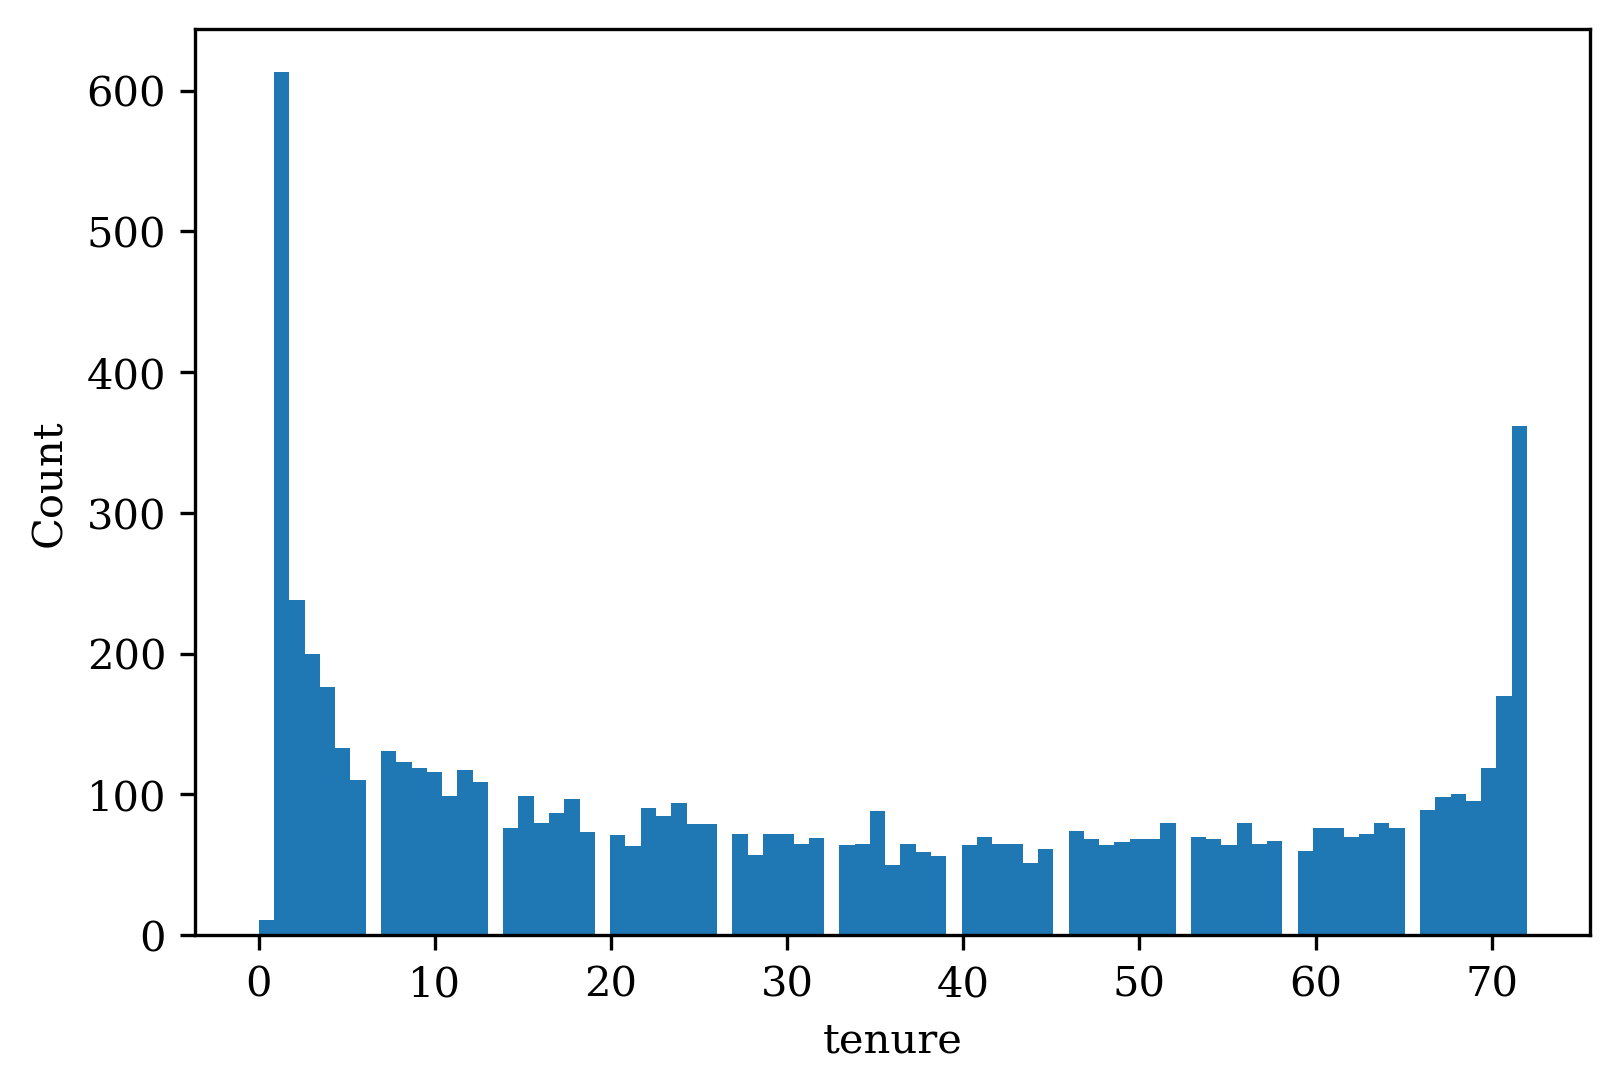

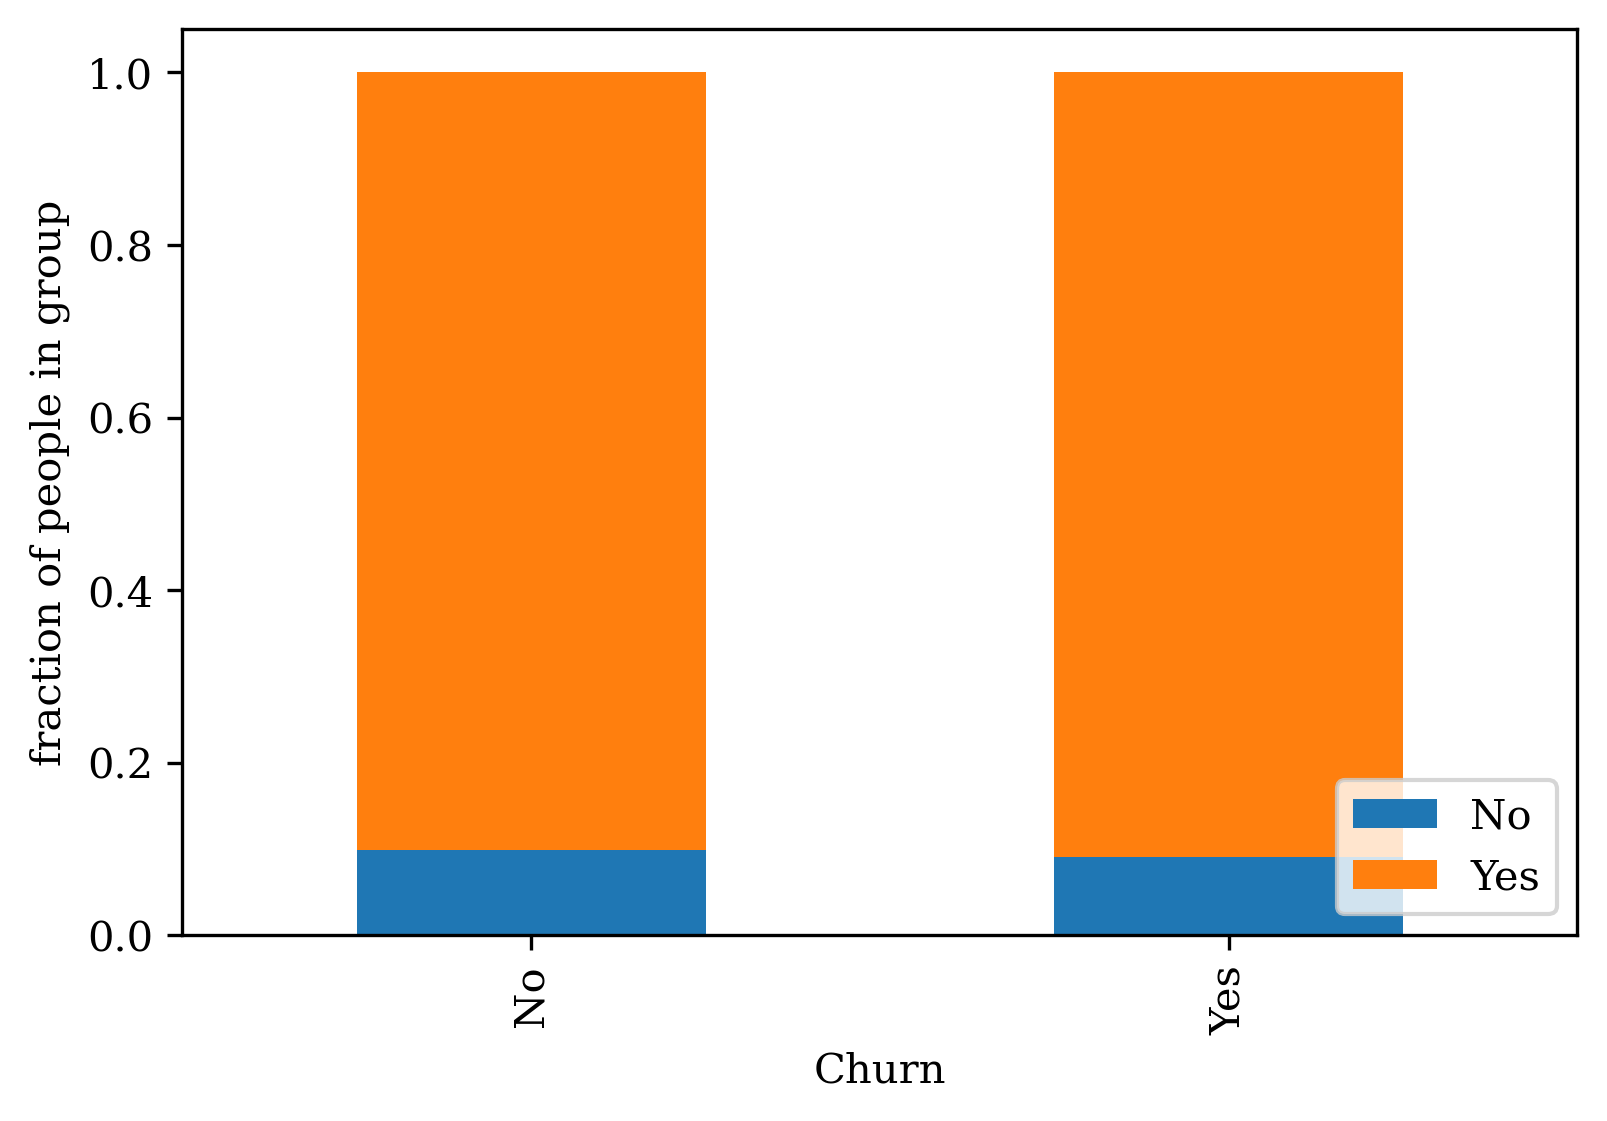

Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64


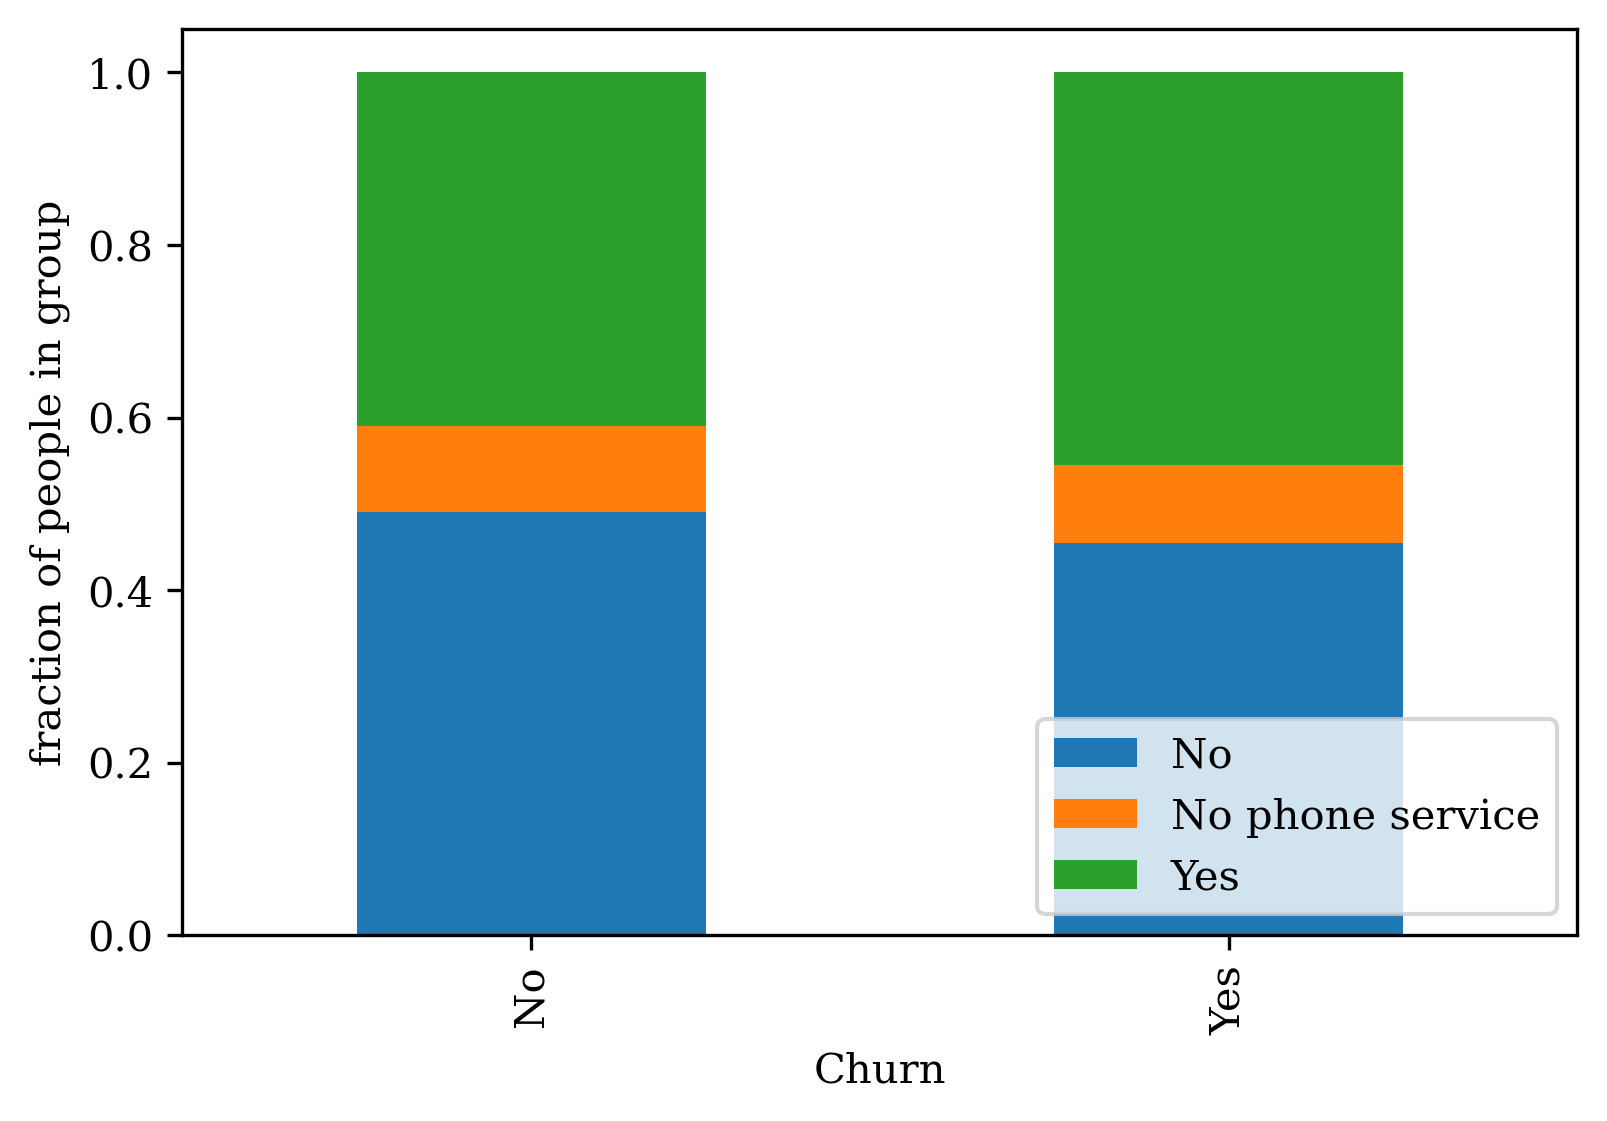

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64


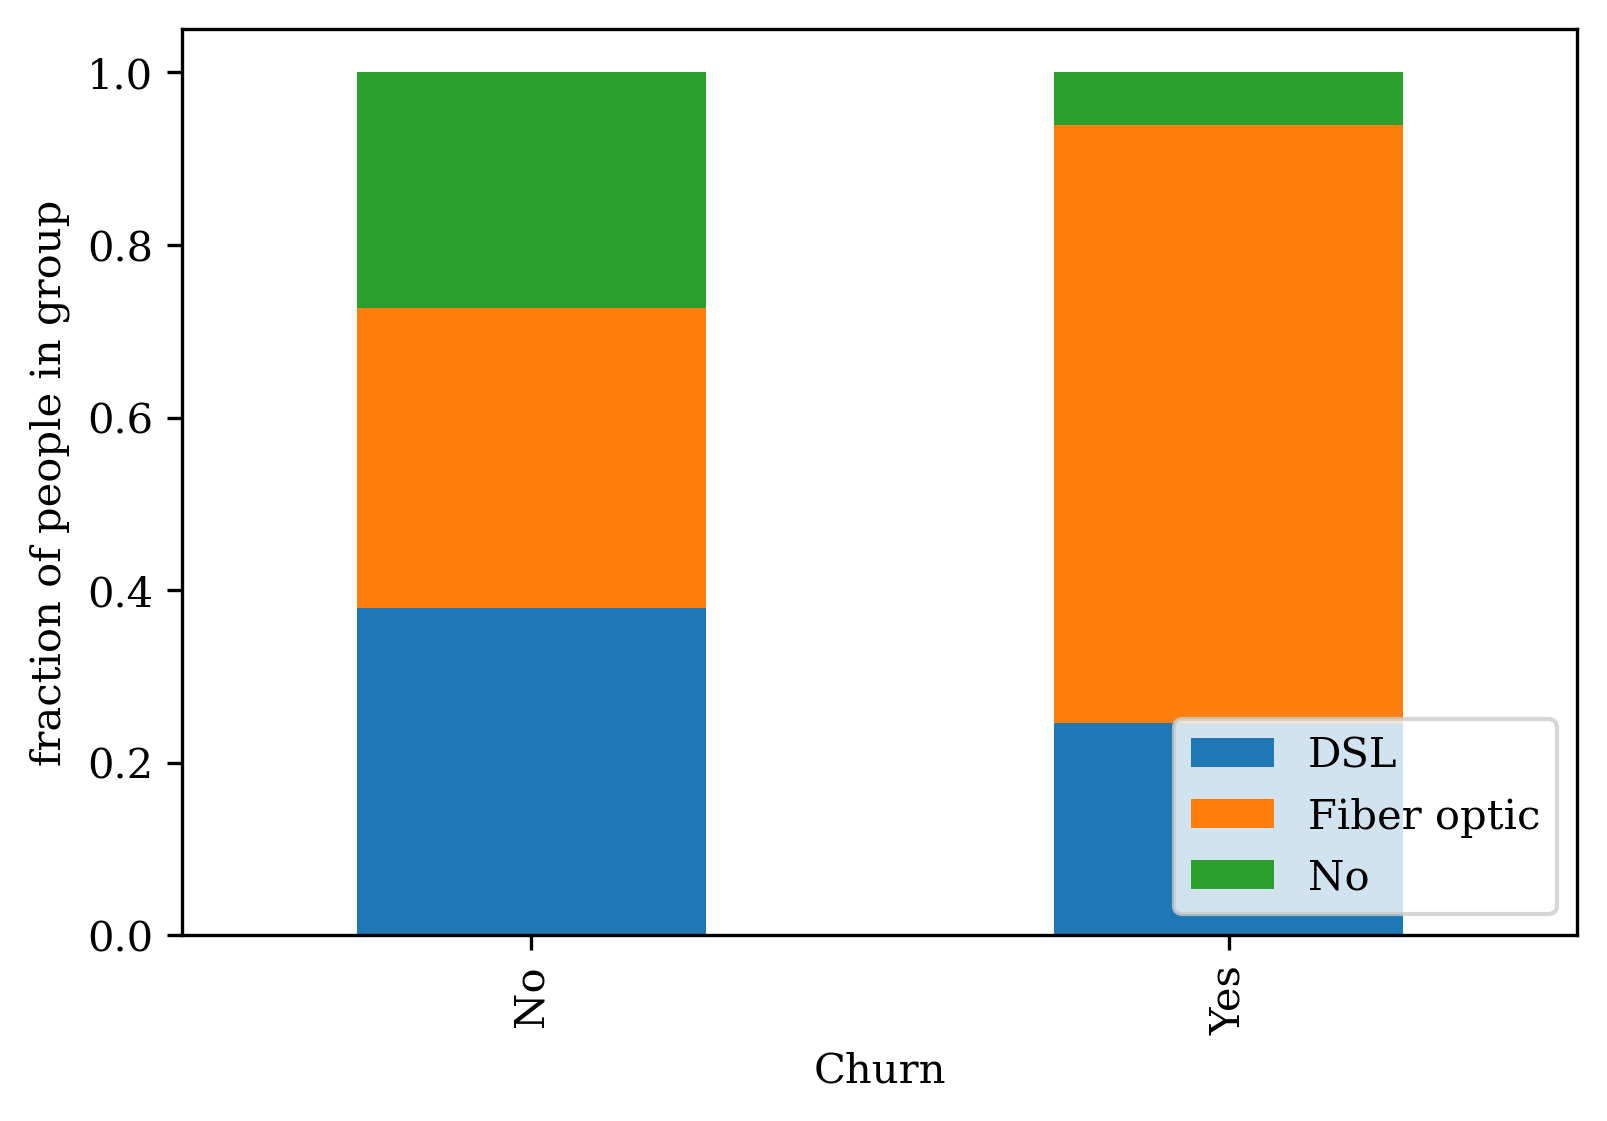

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64


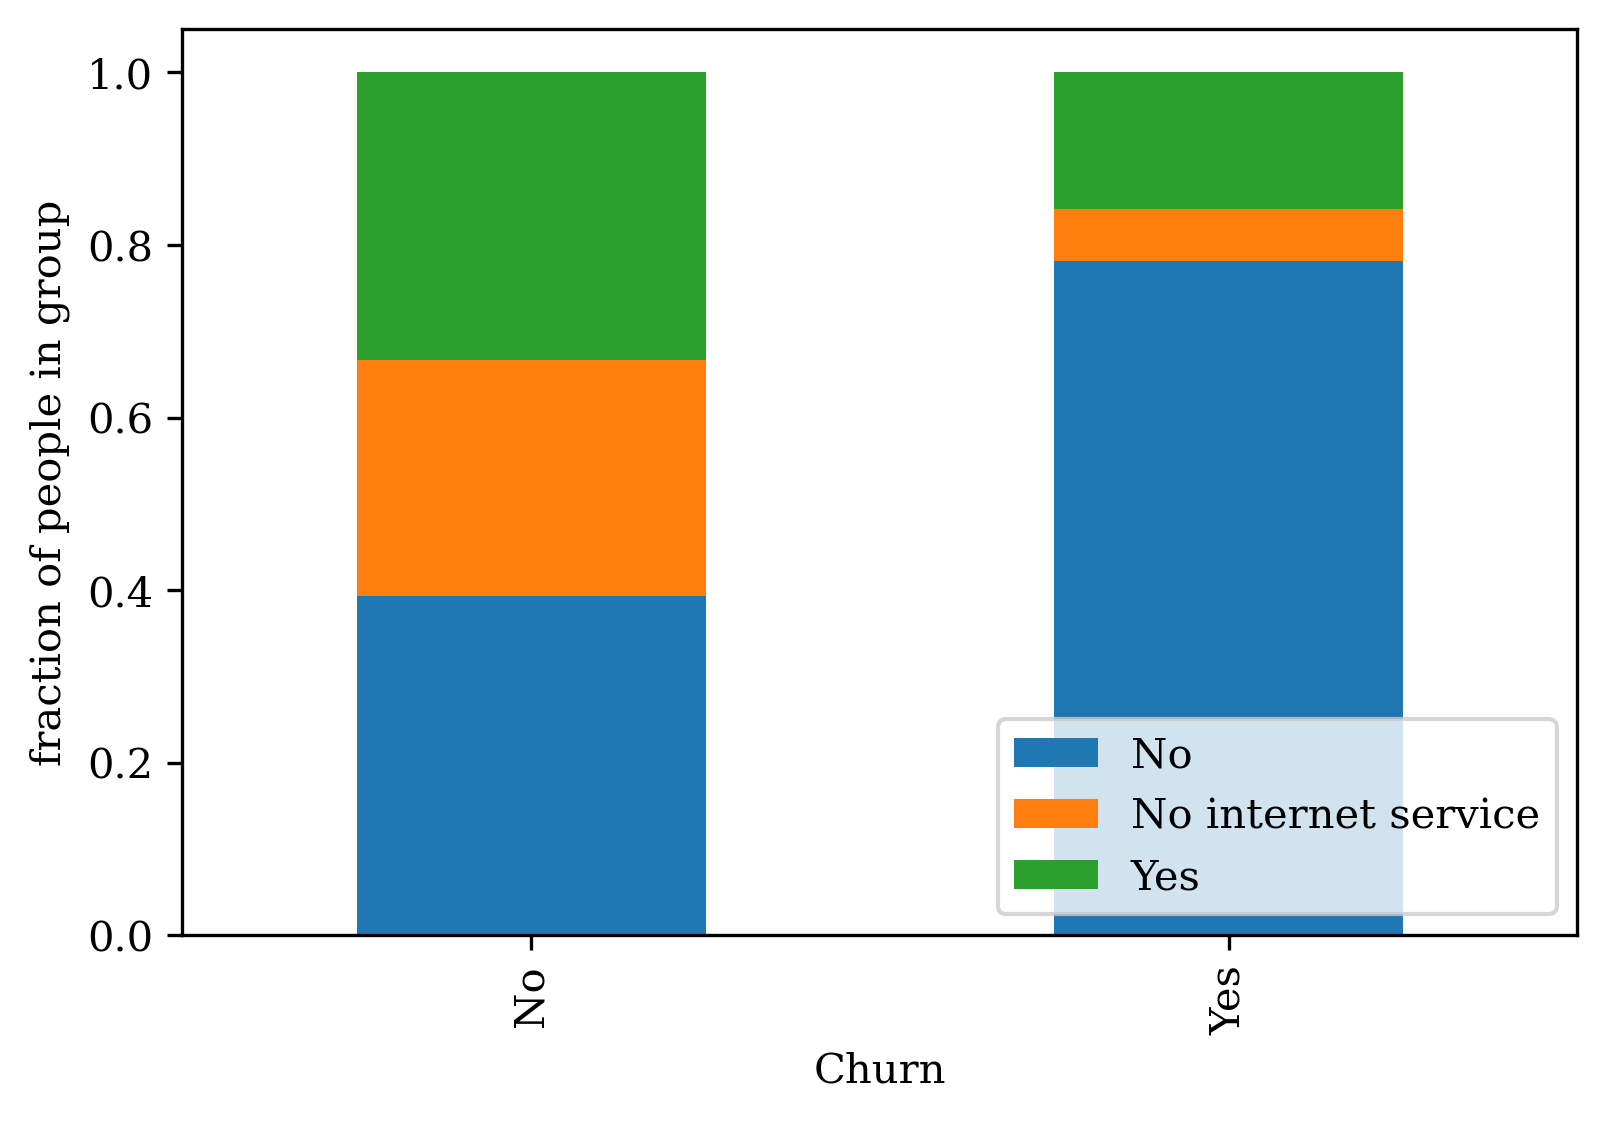

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64


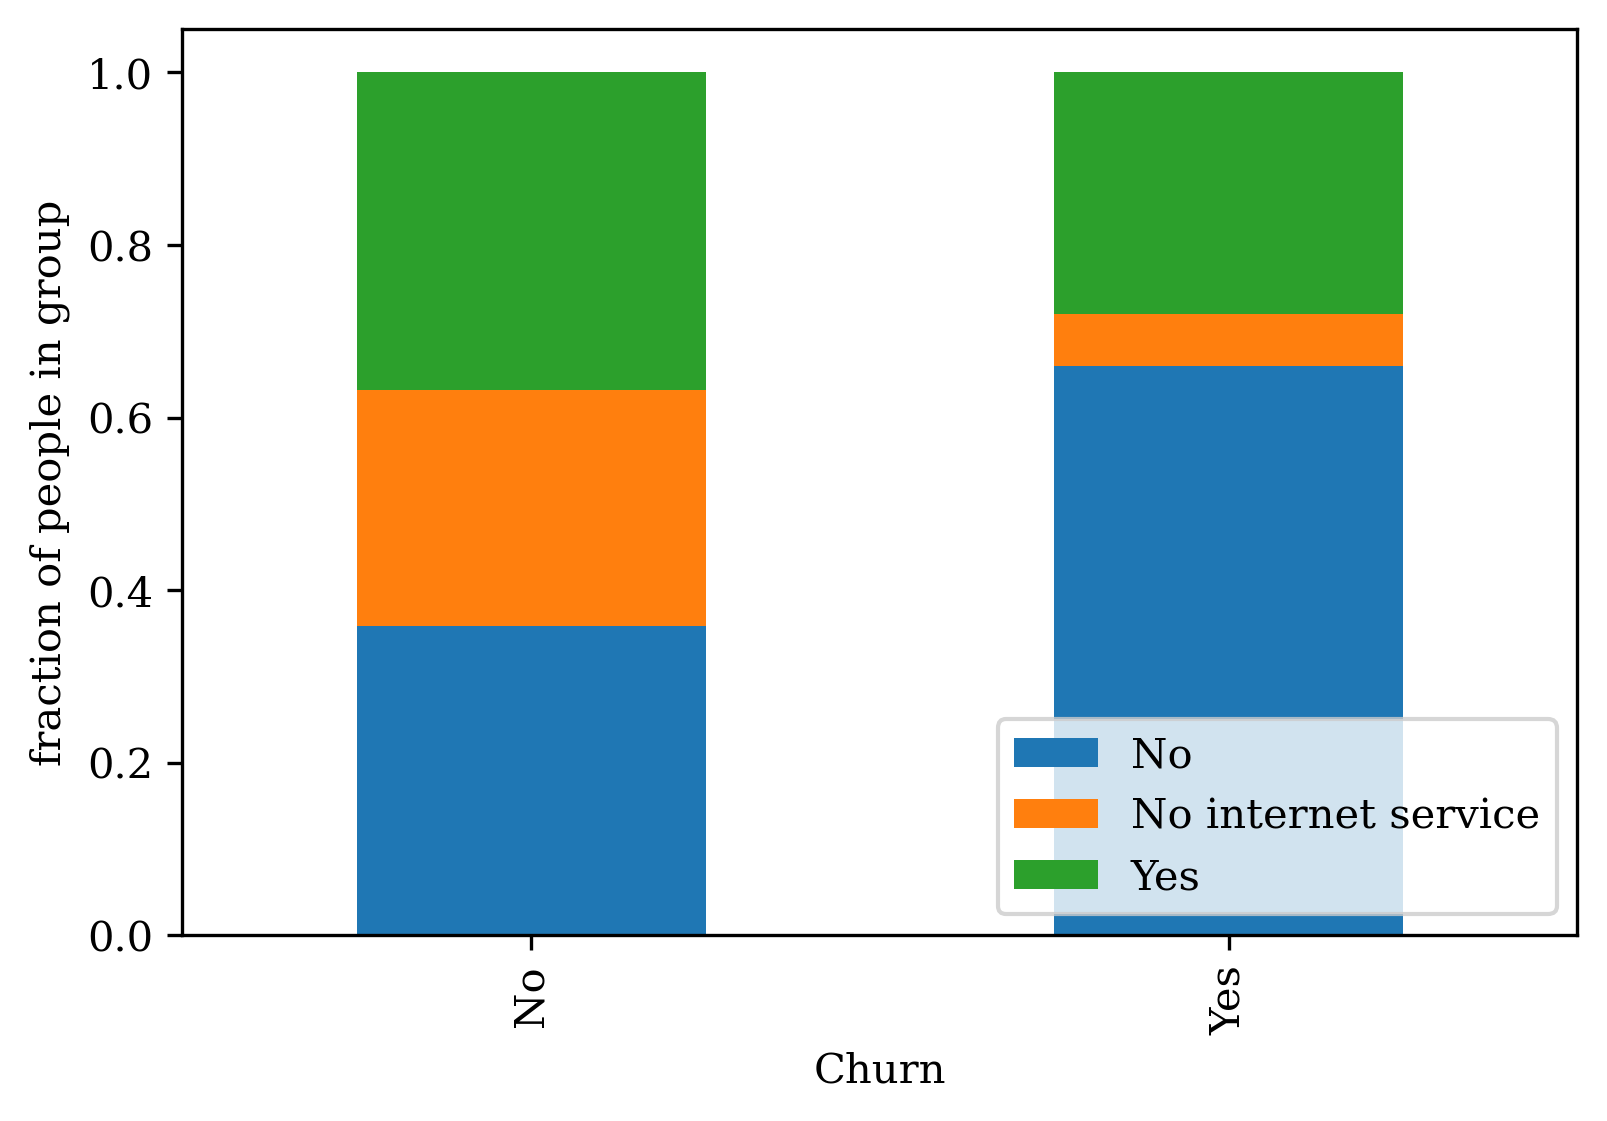

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64


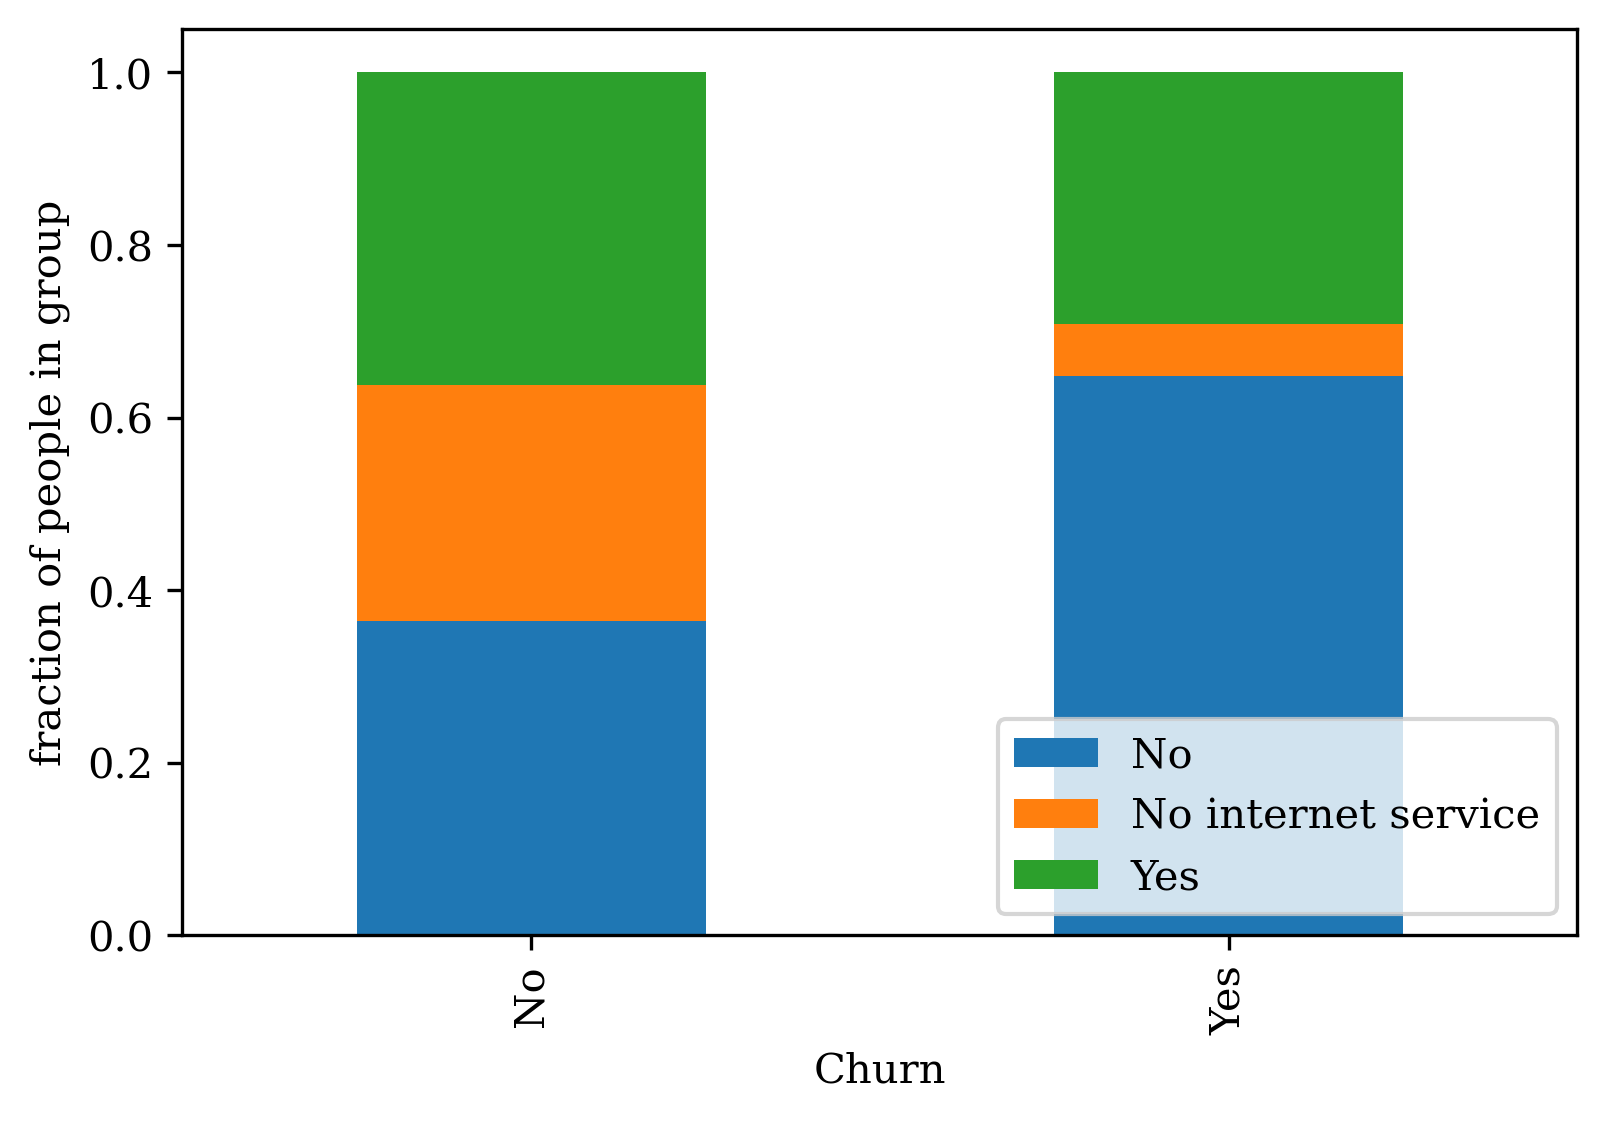

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64


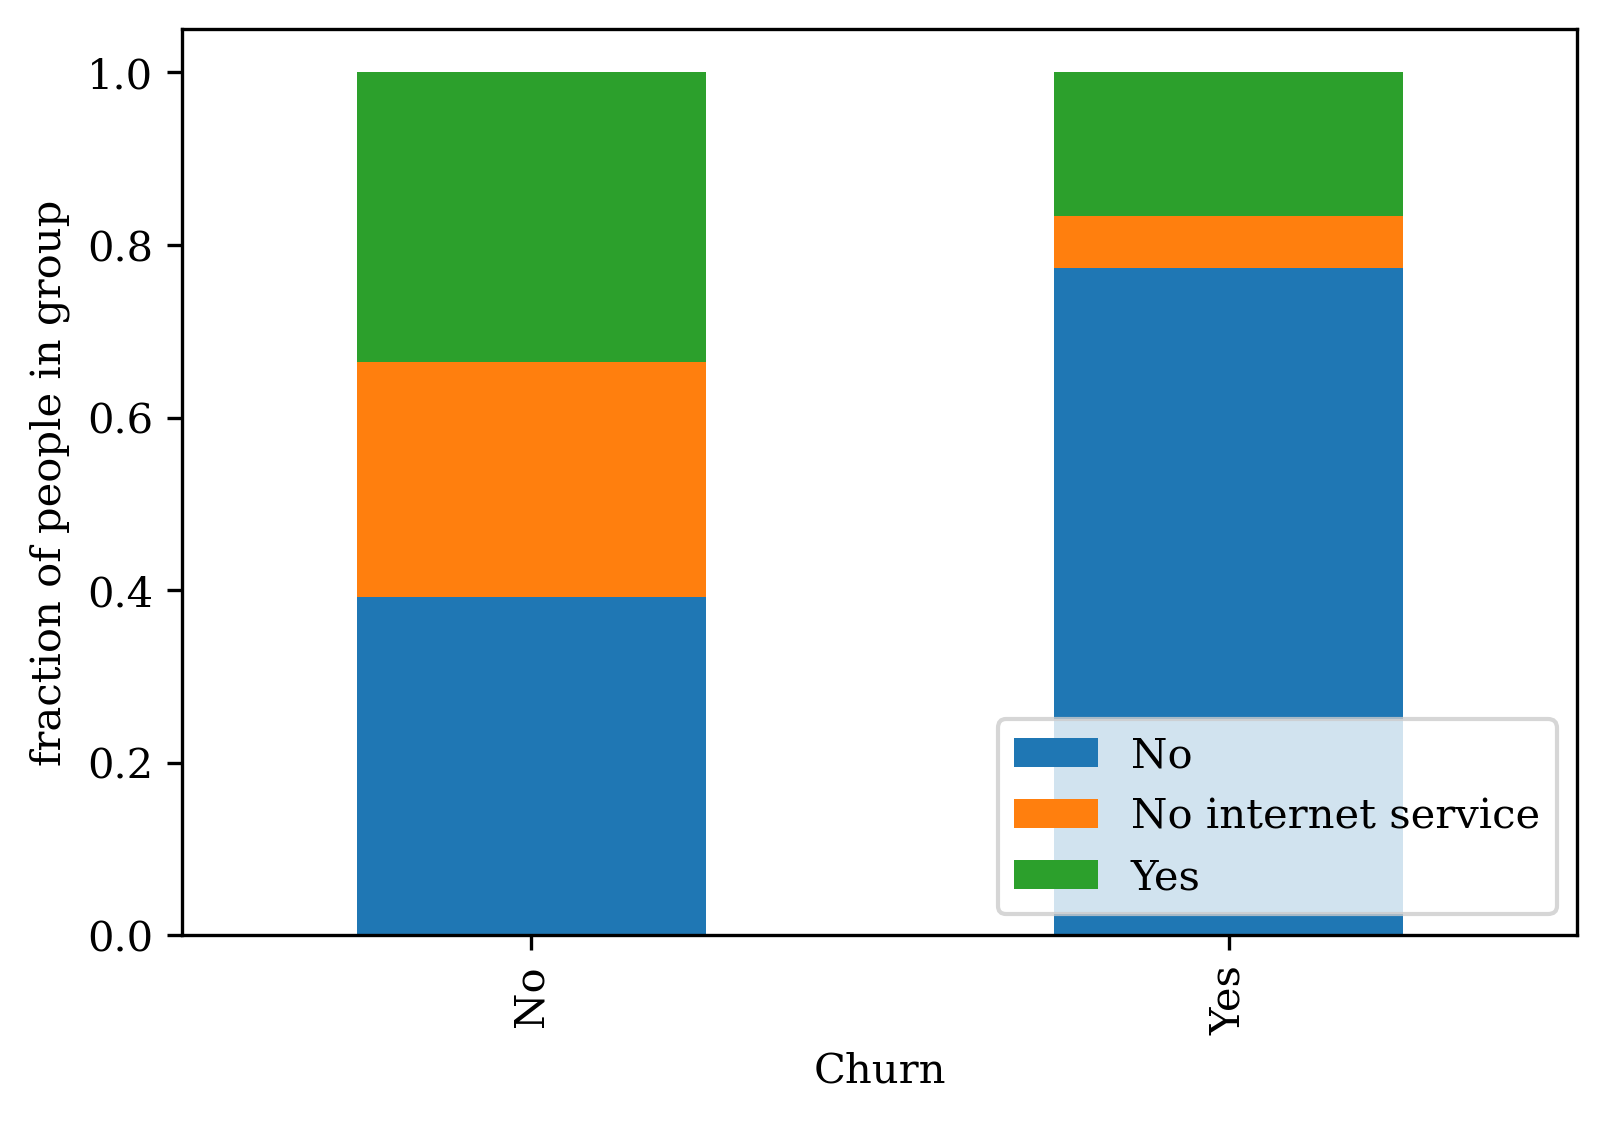

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64


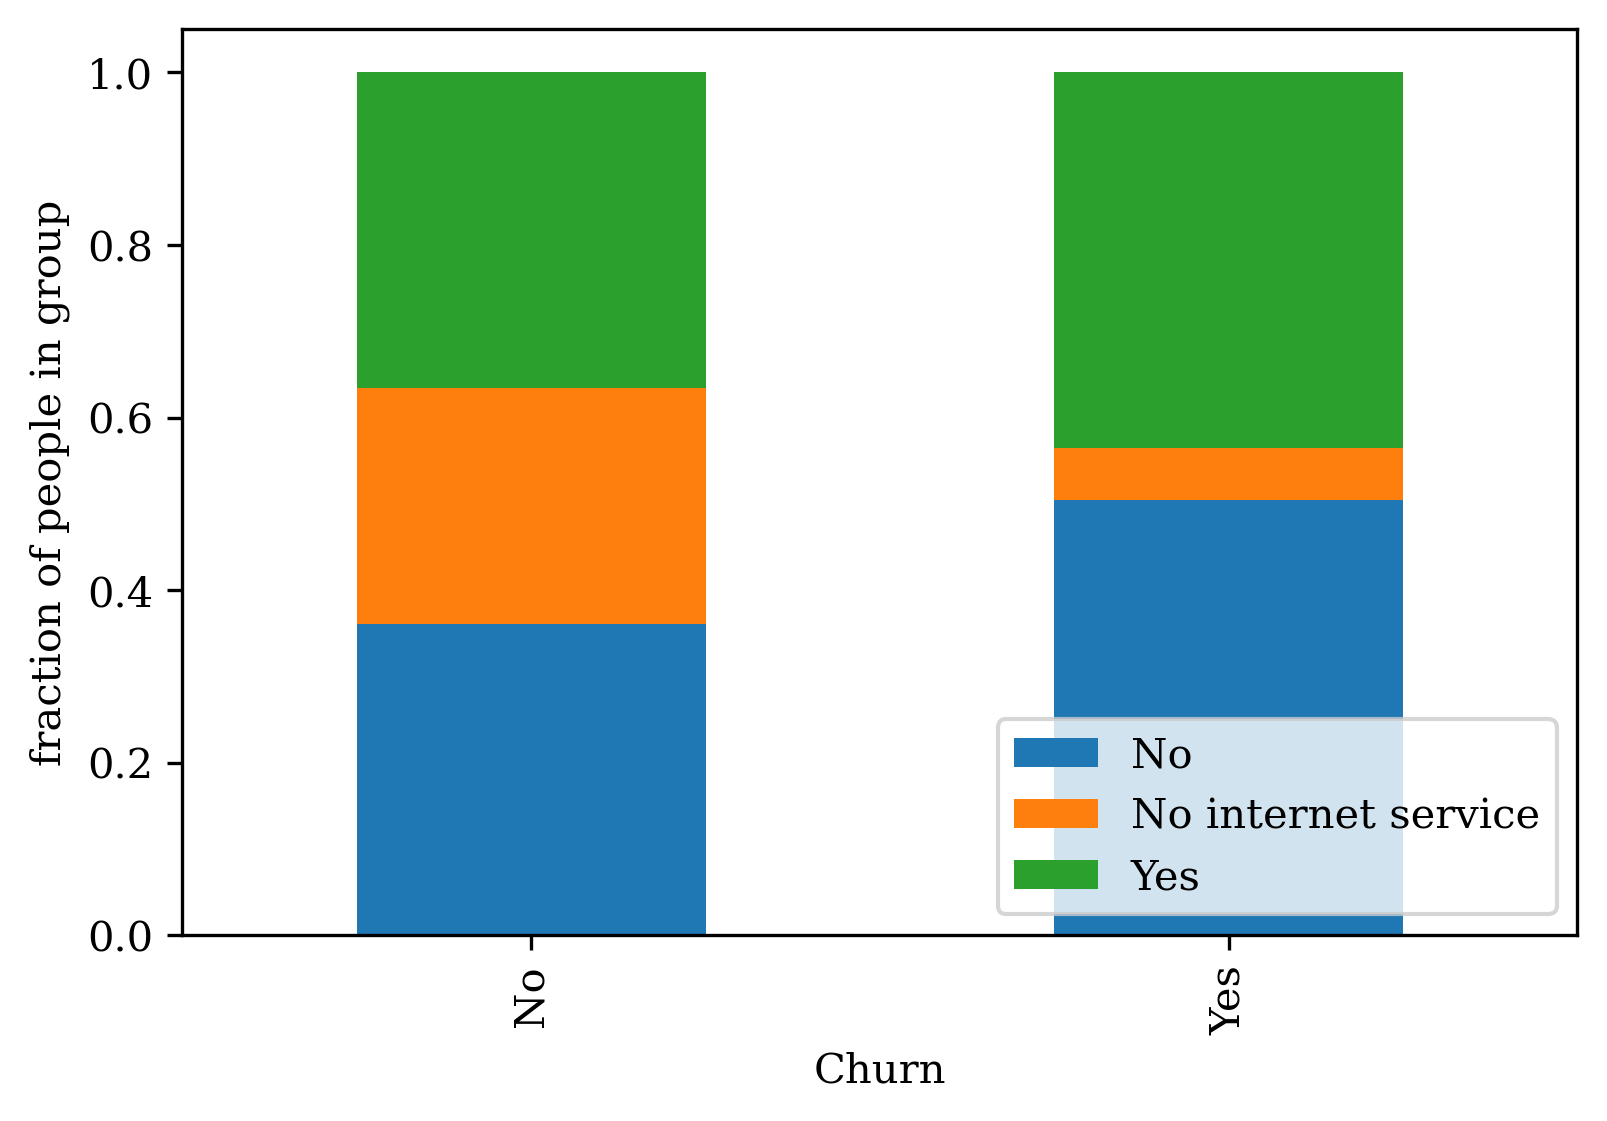

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64


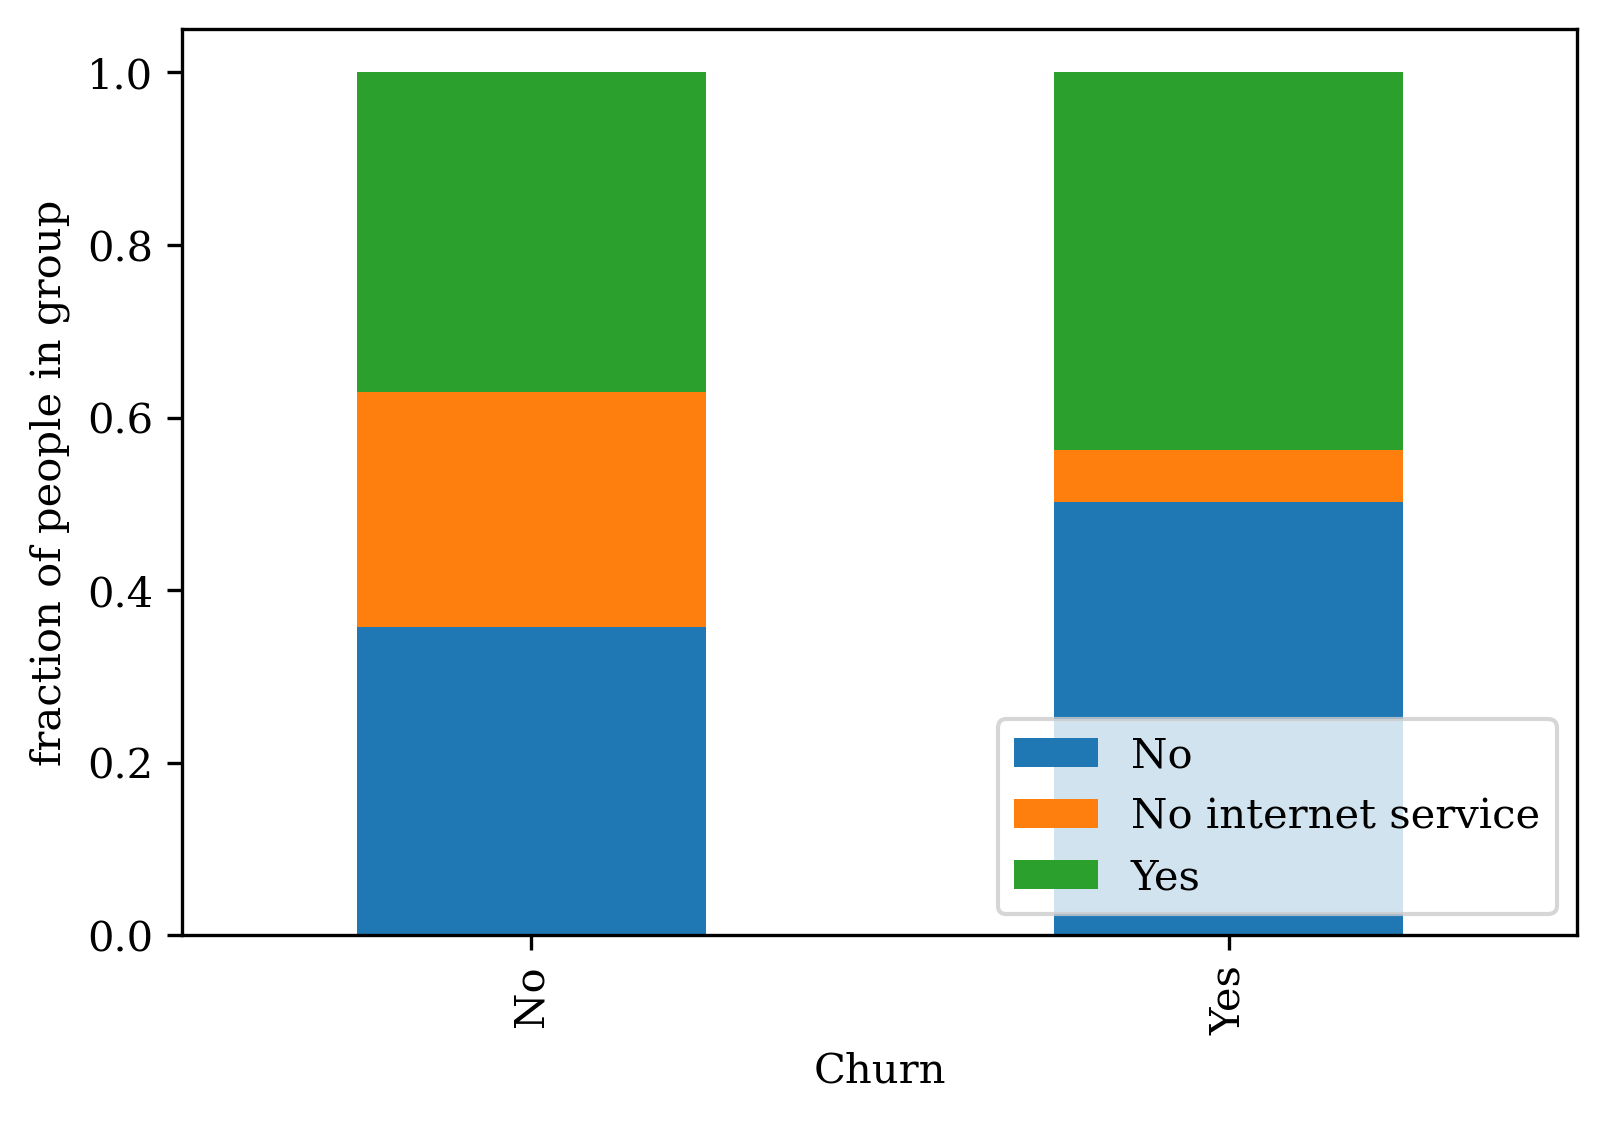

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64


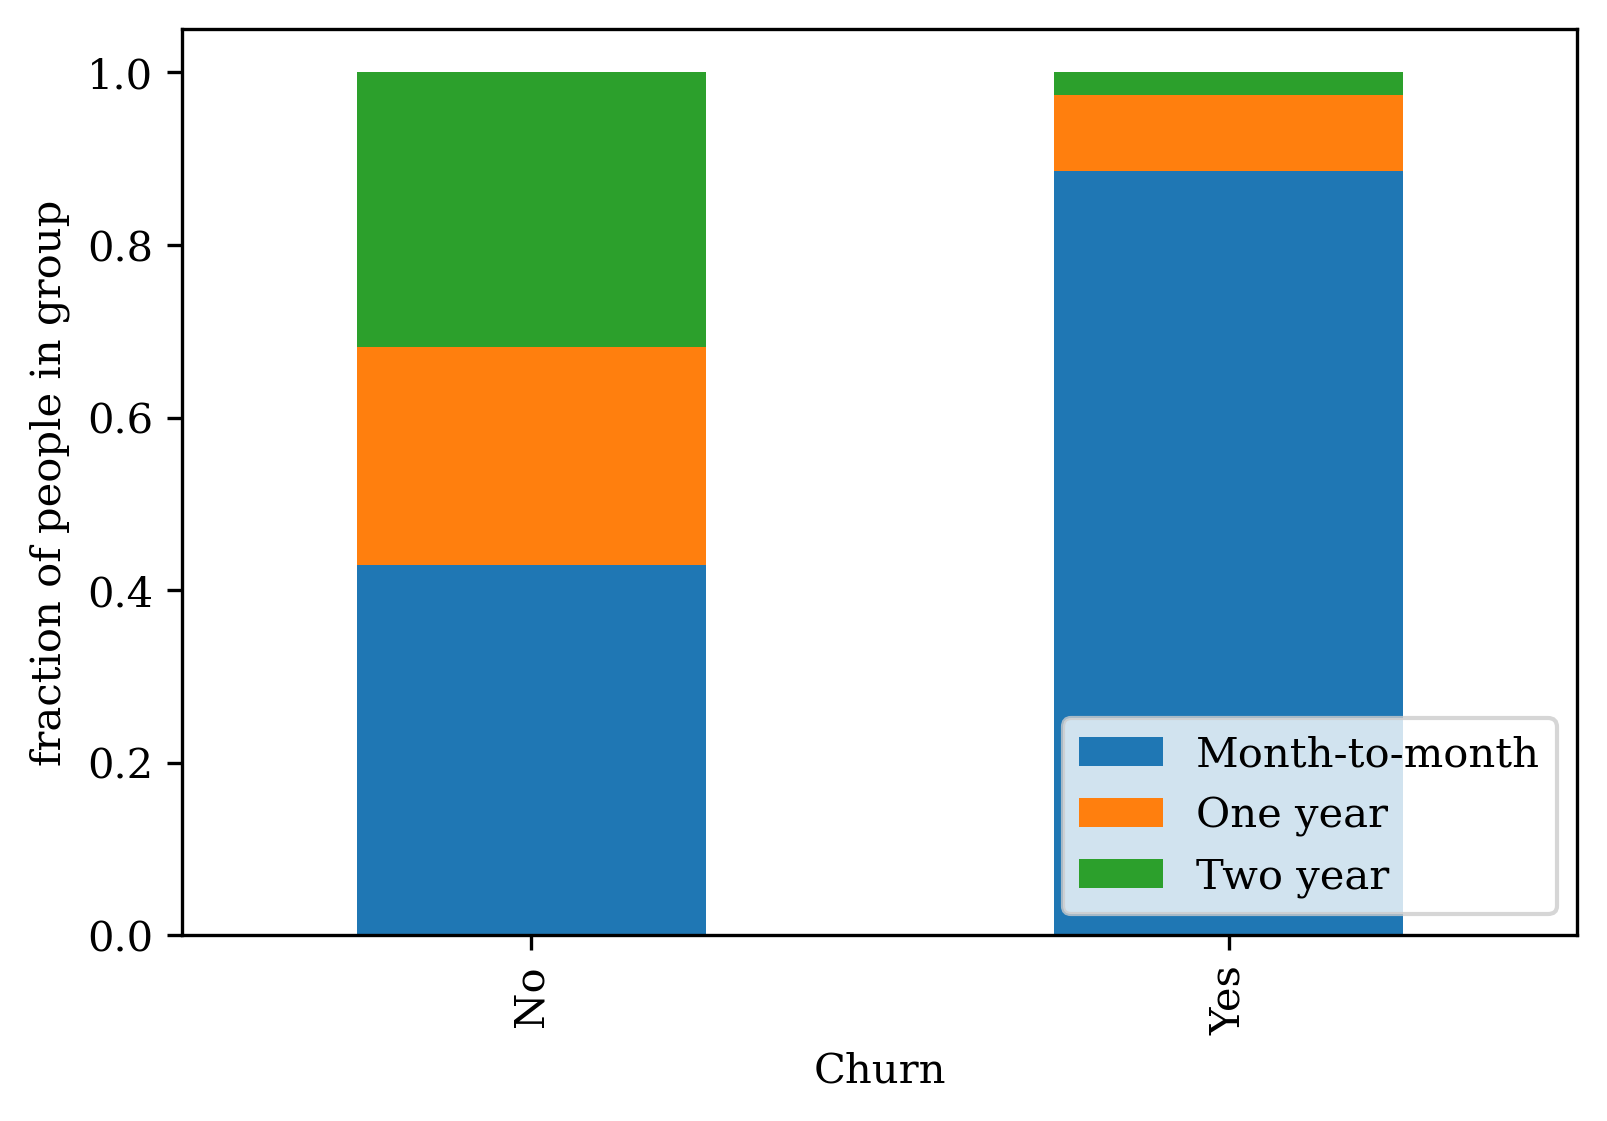

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64


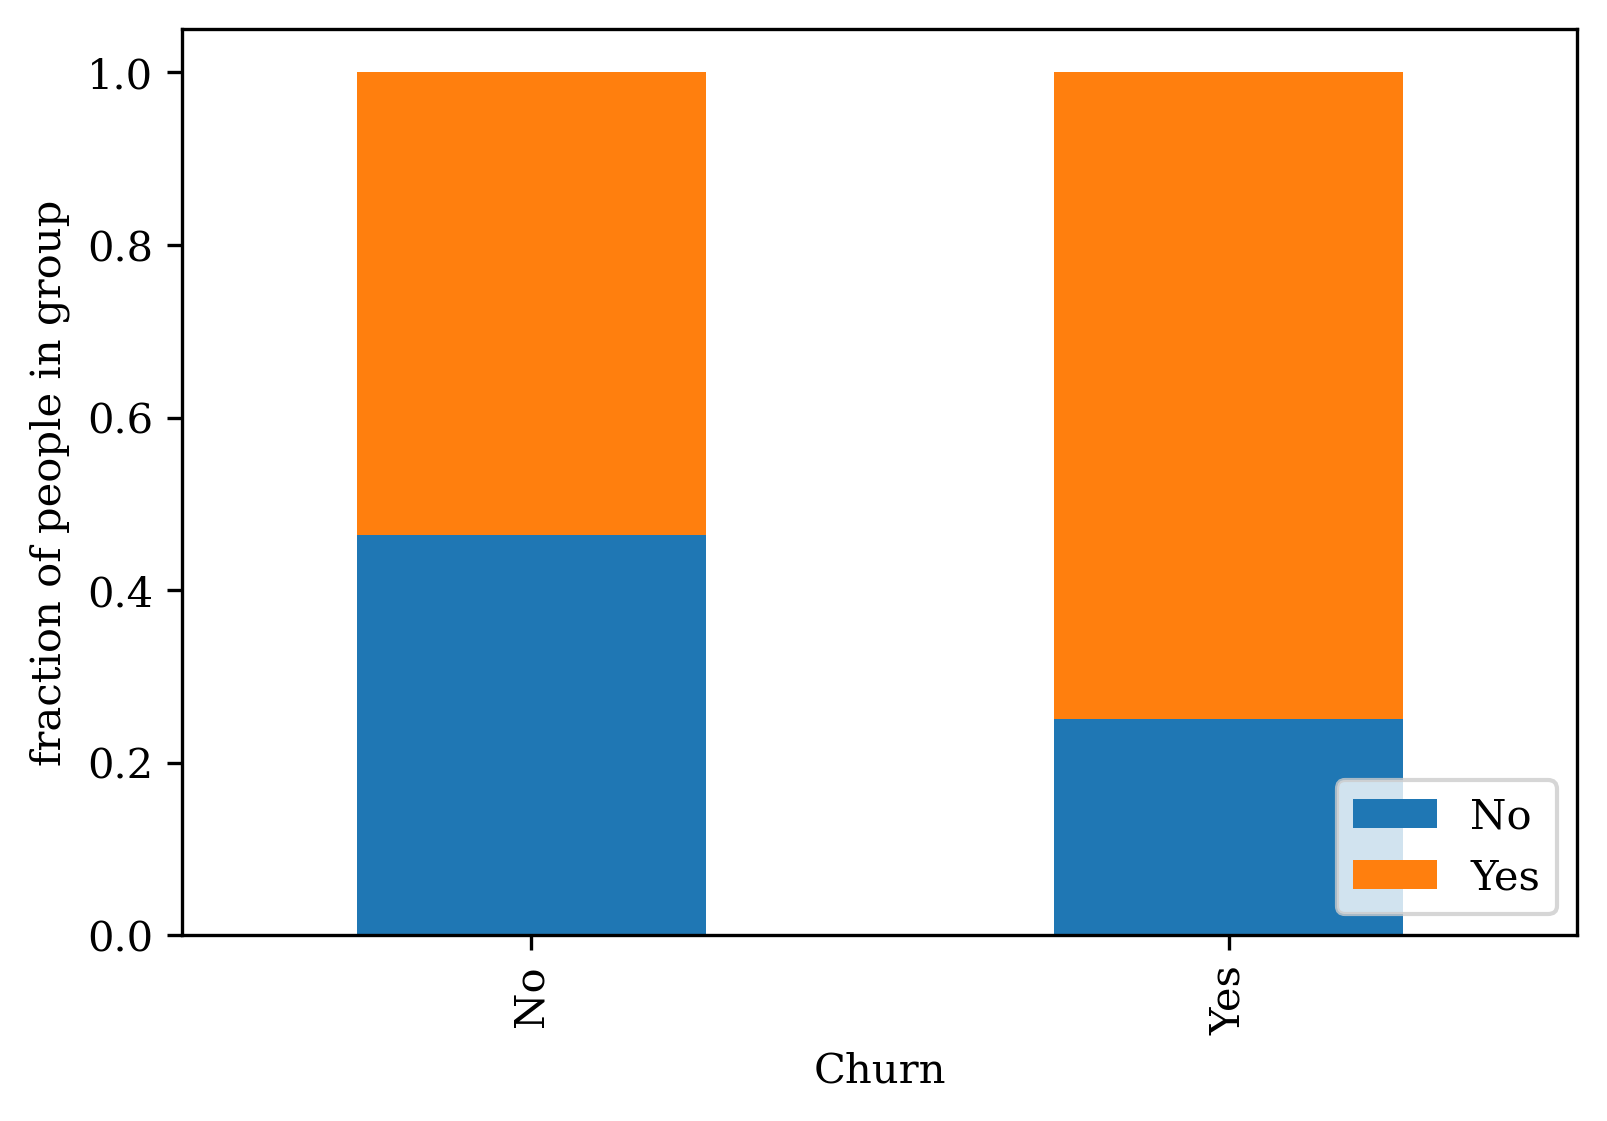

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64


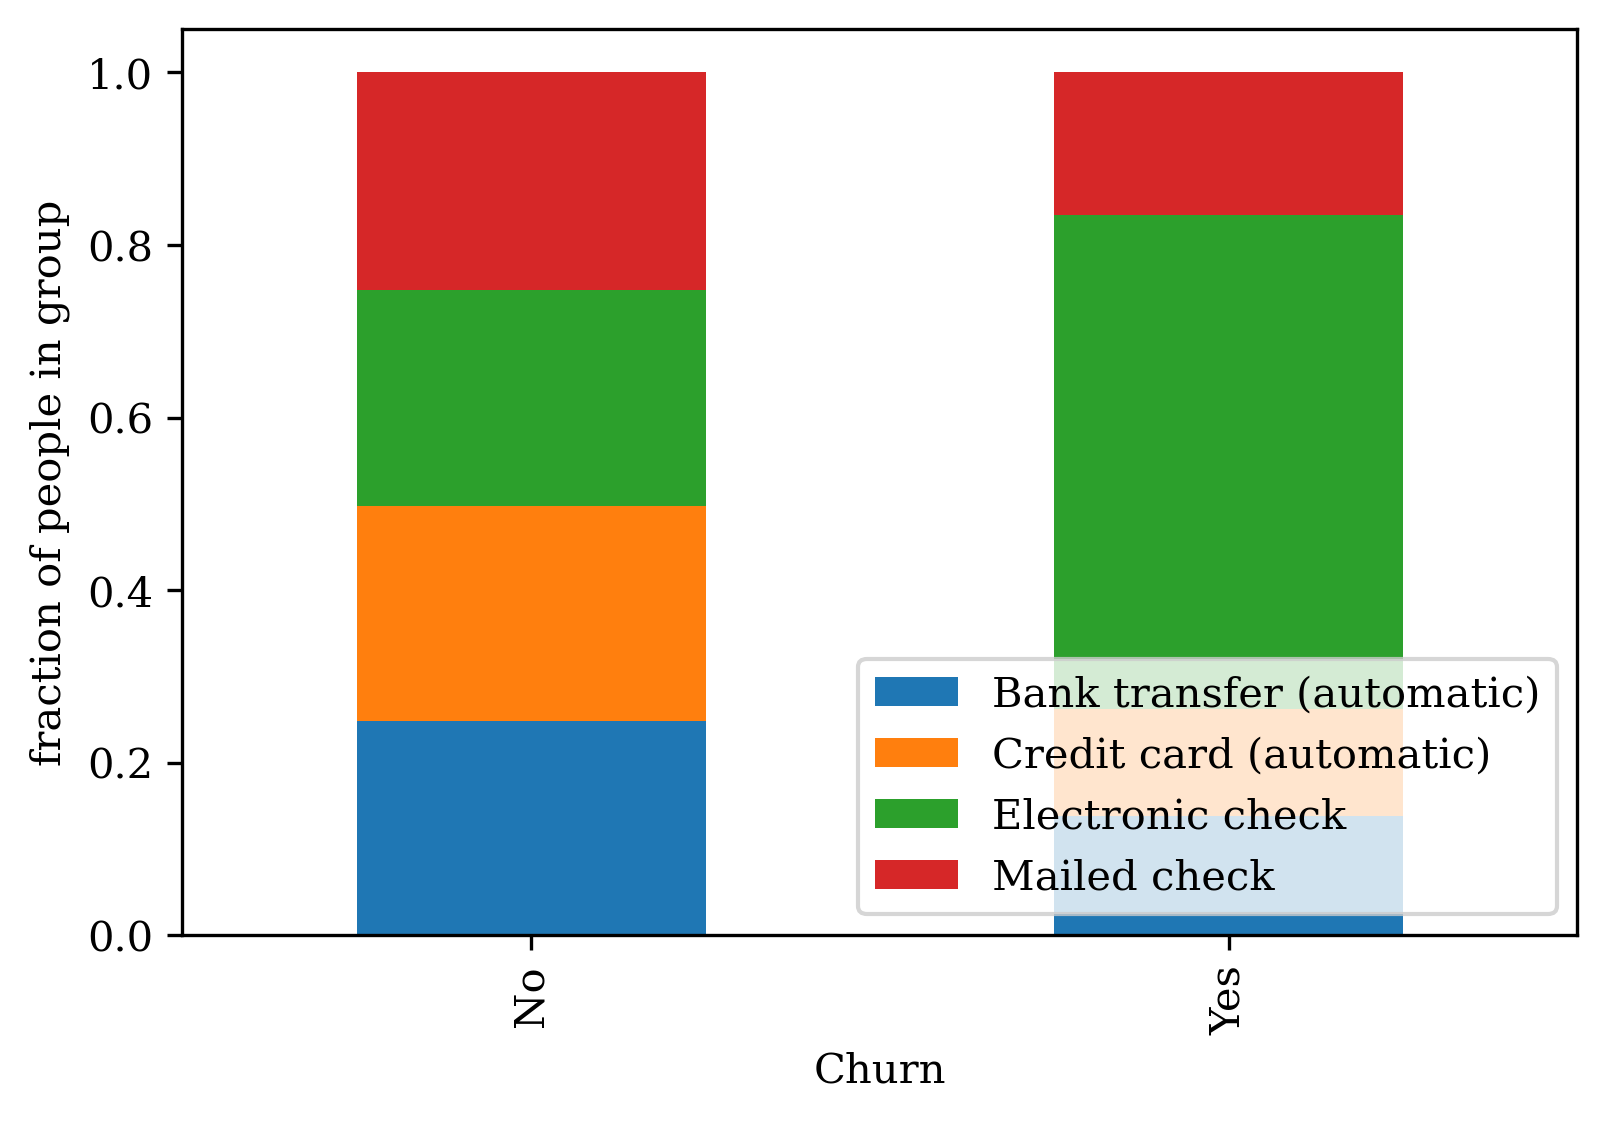

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64


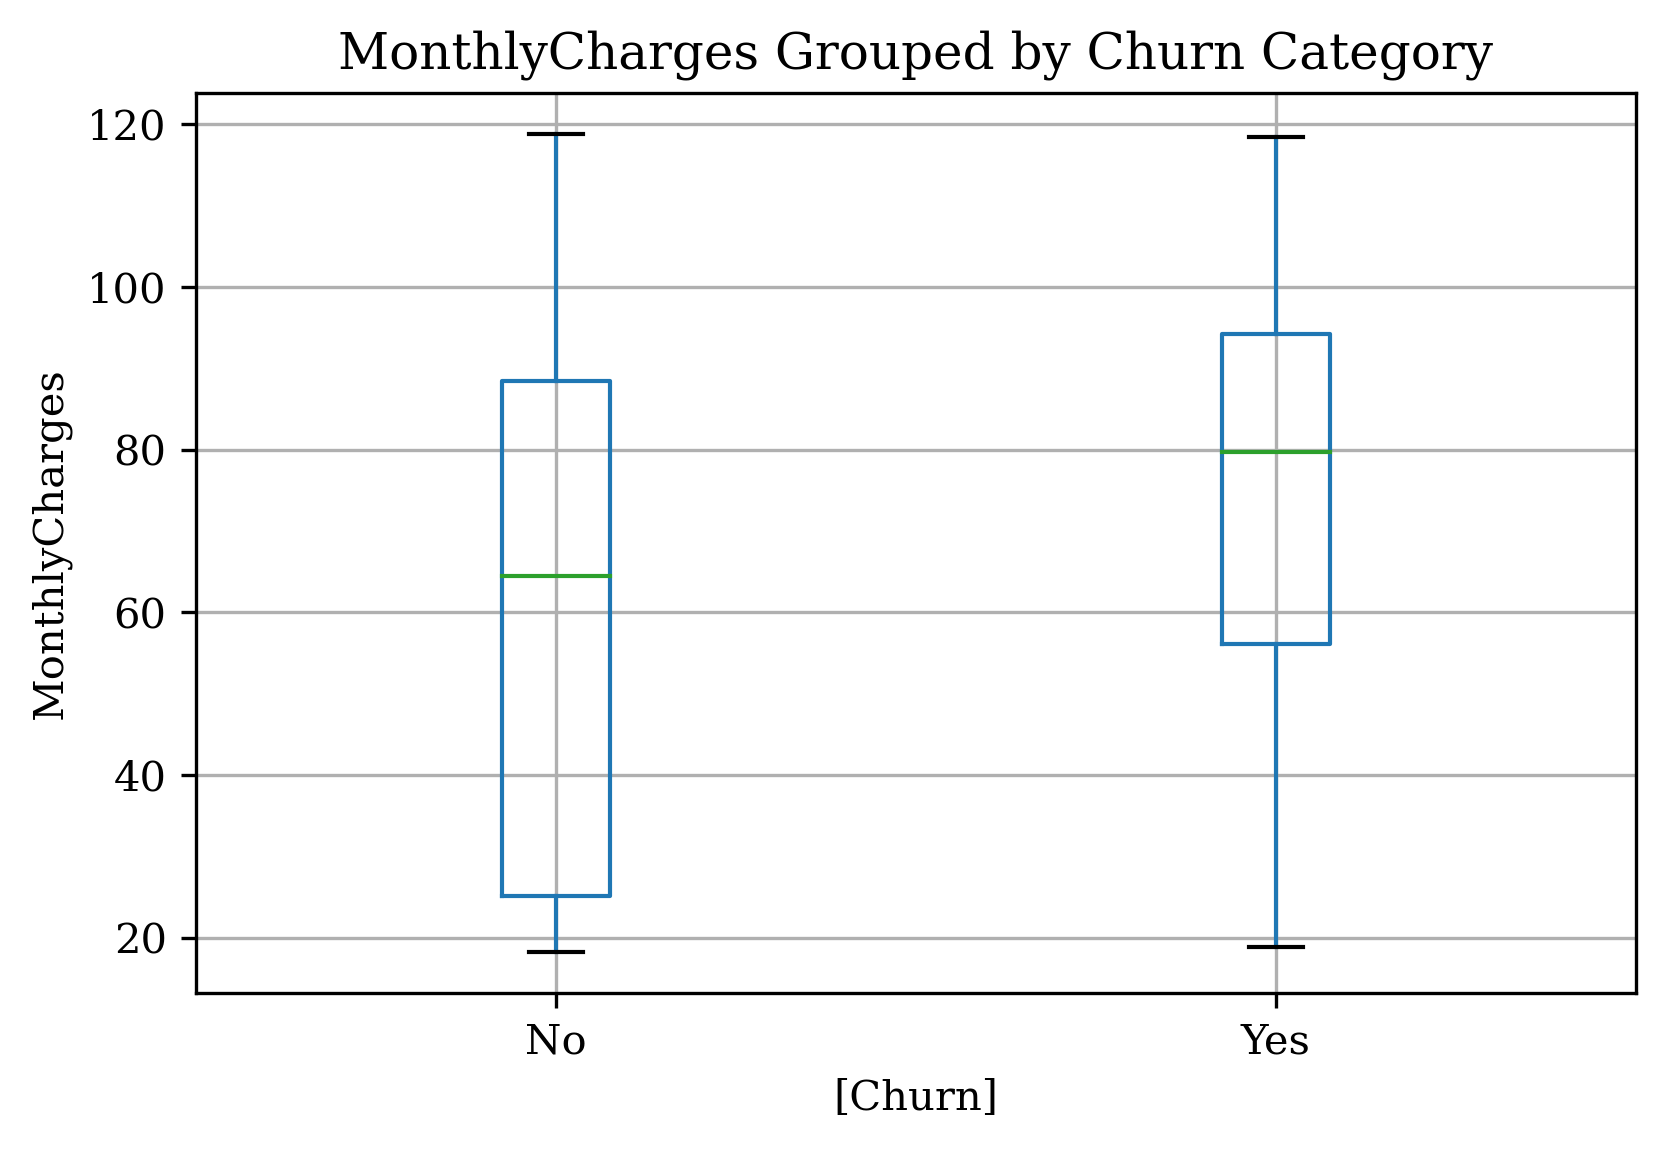

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


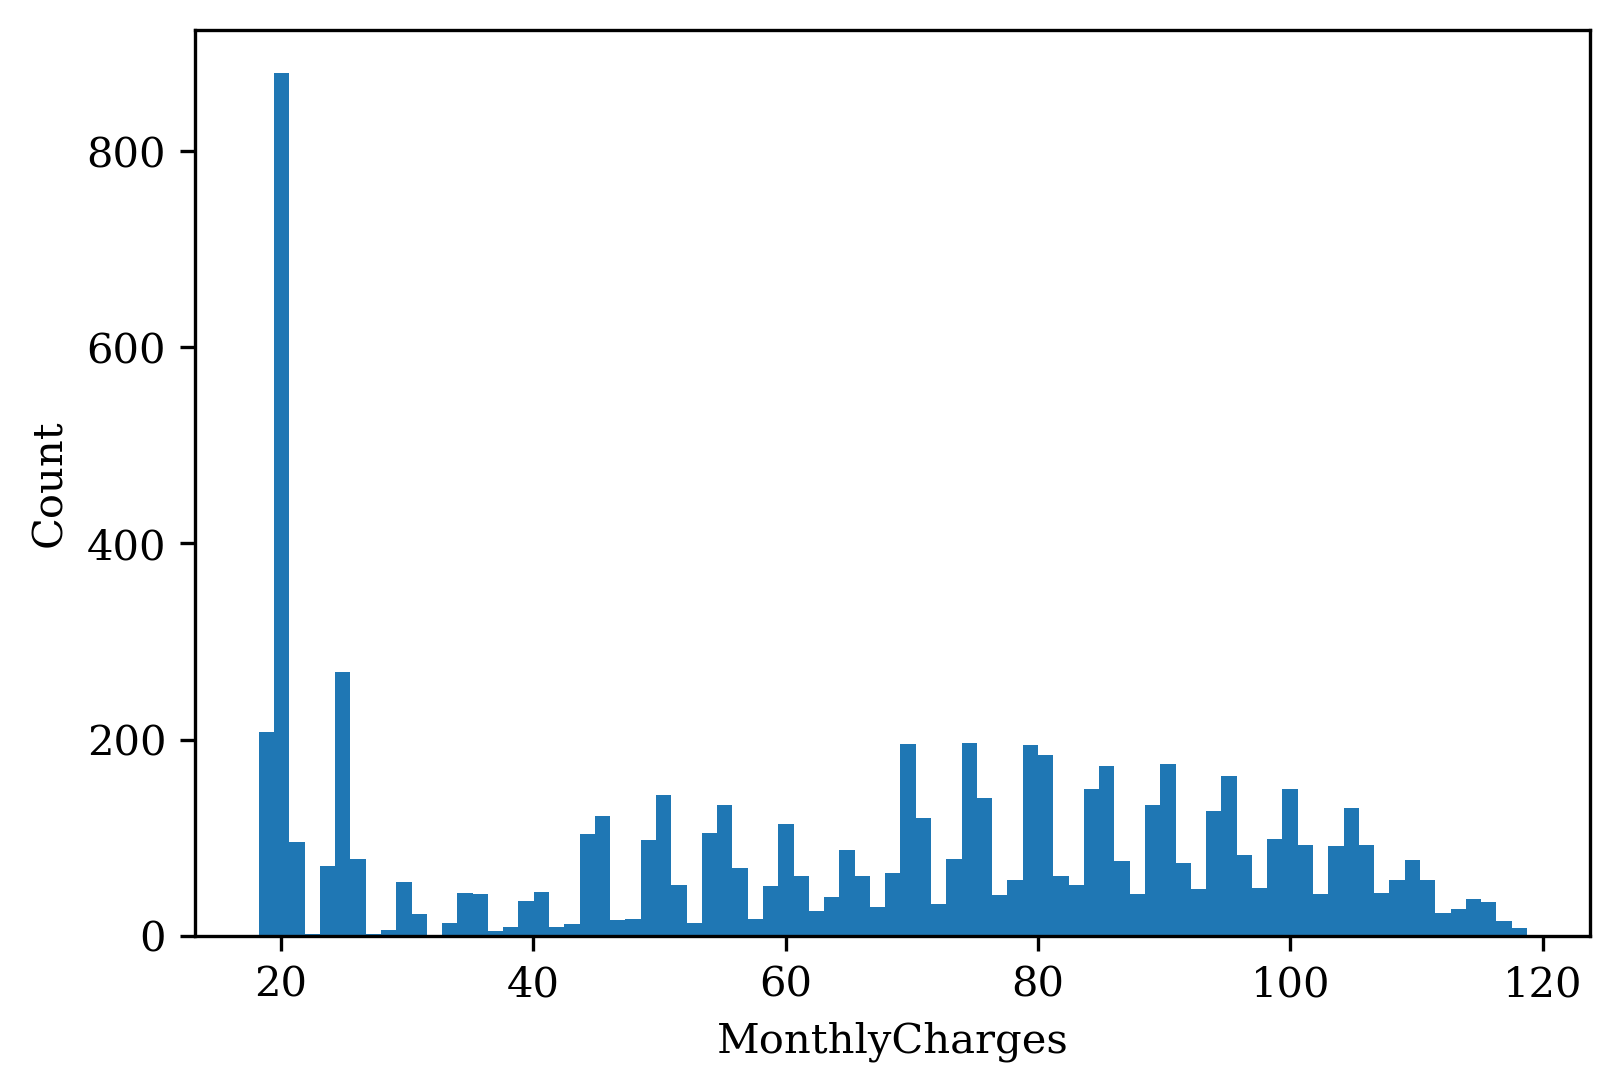

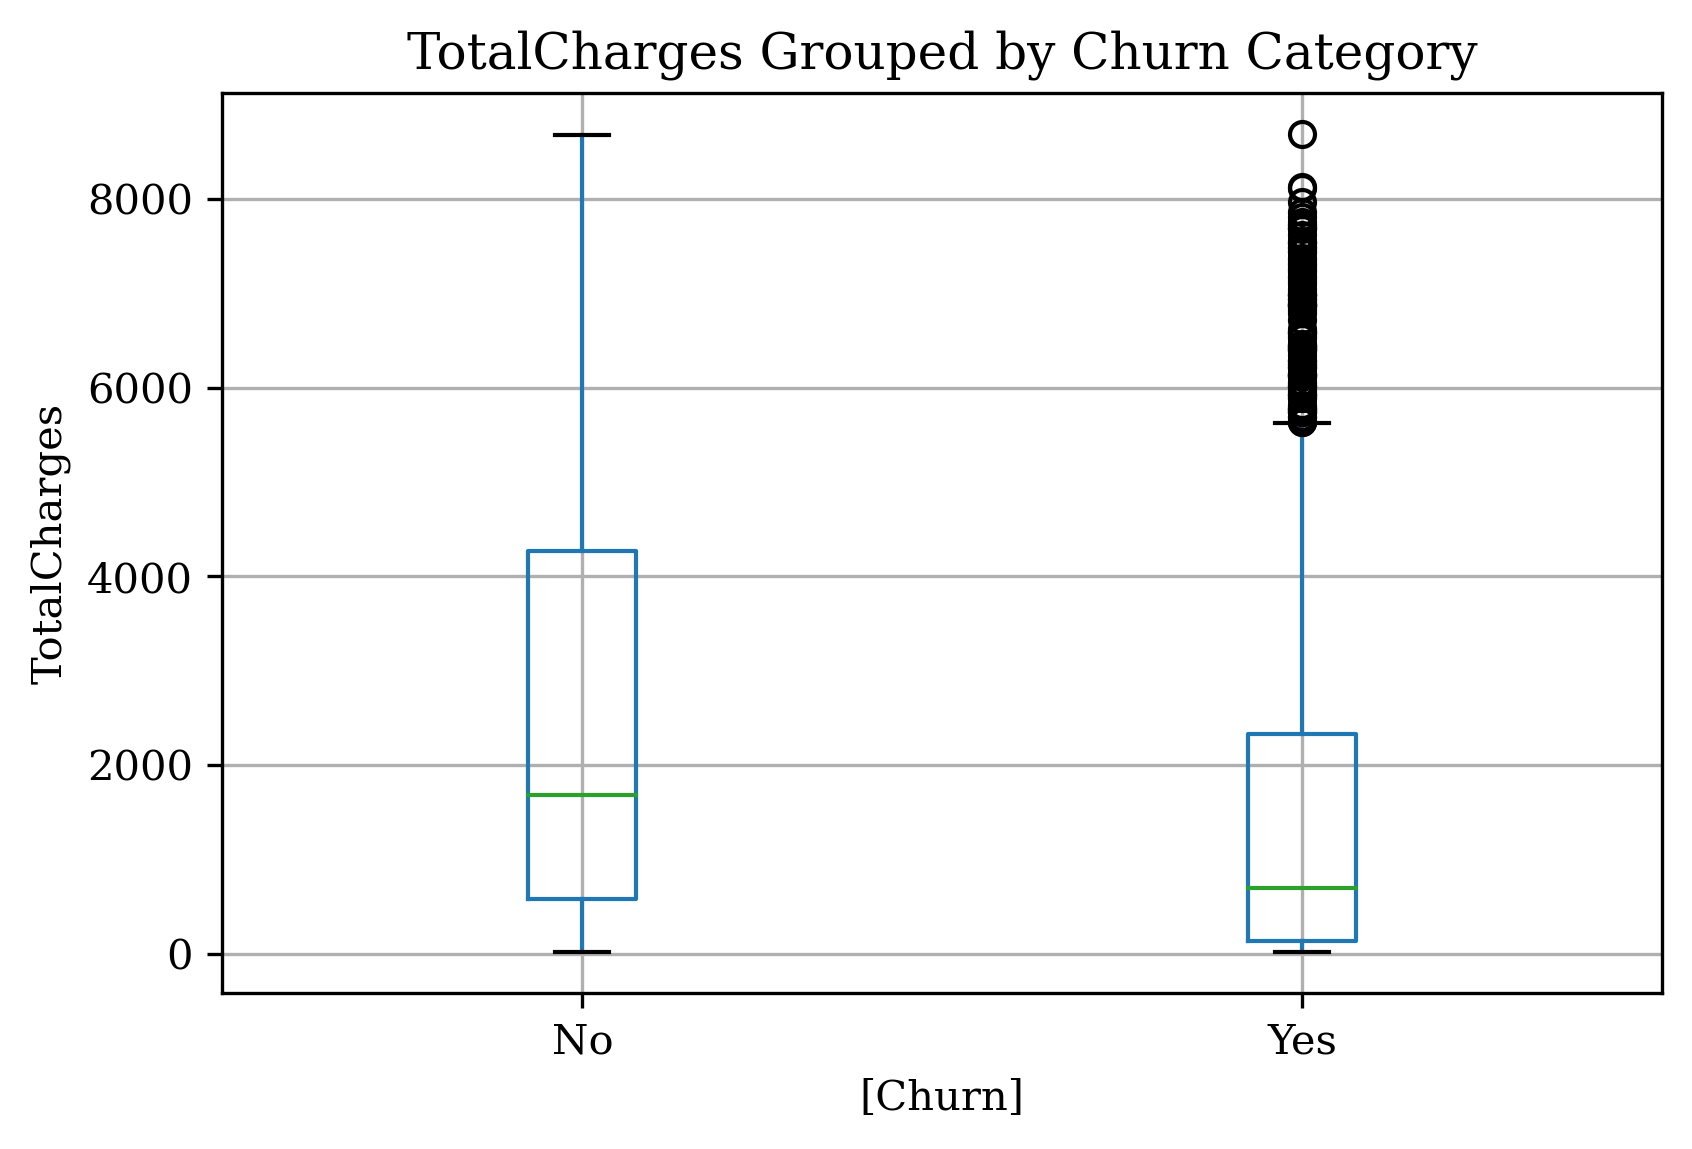

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


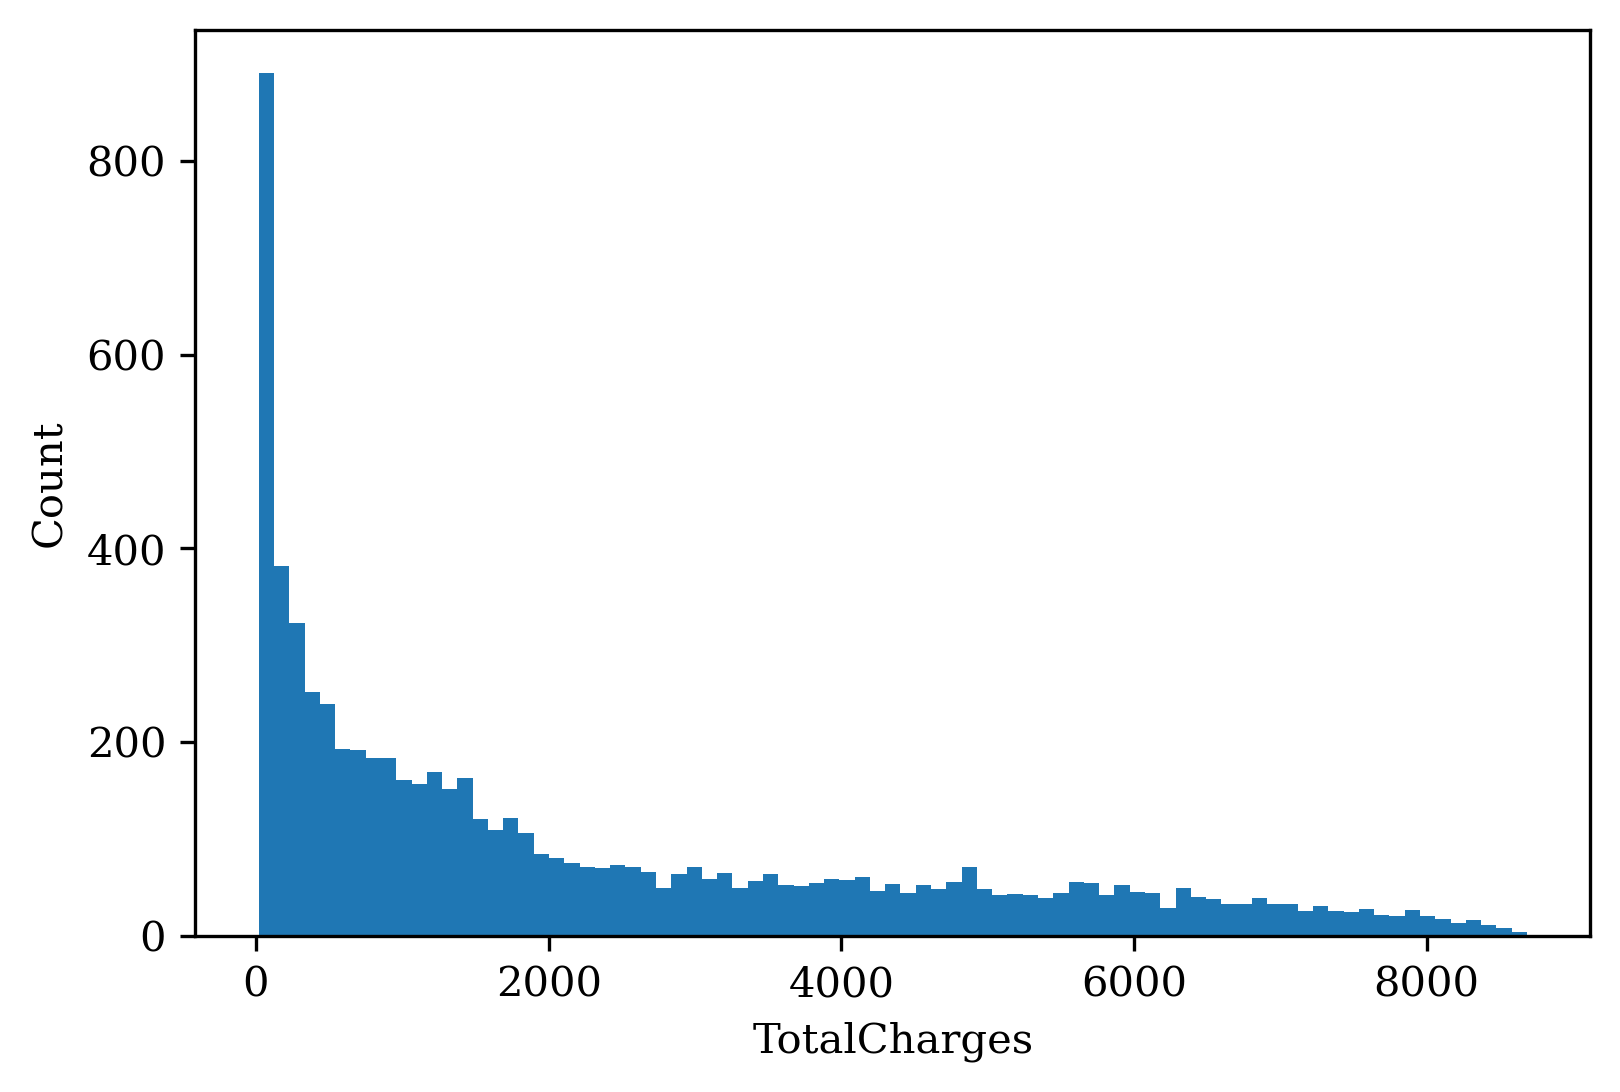

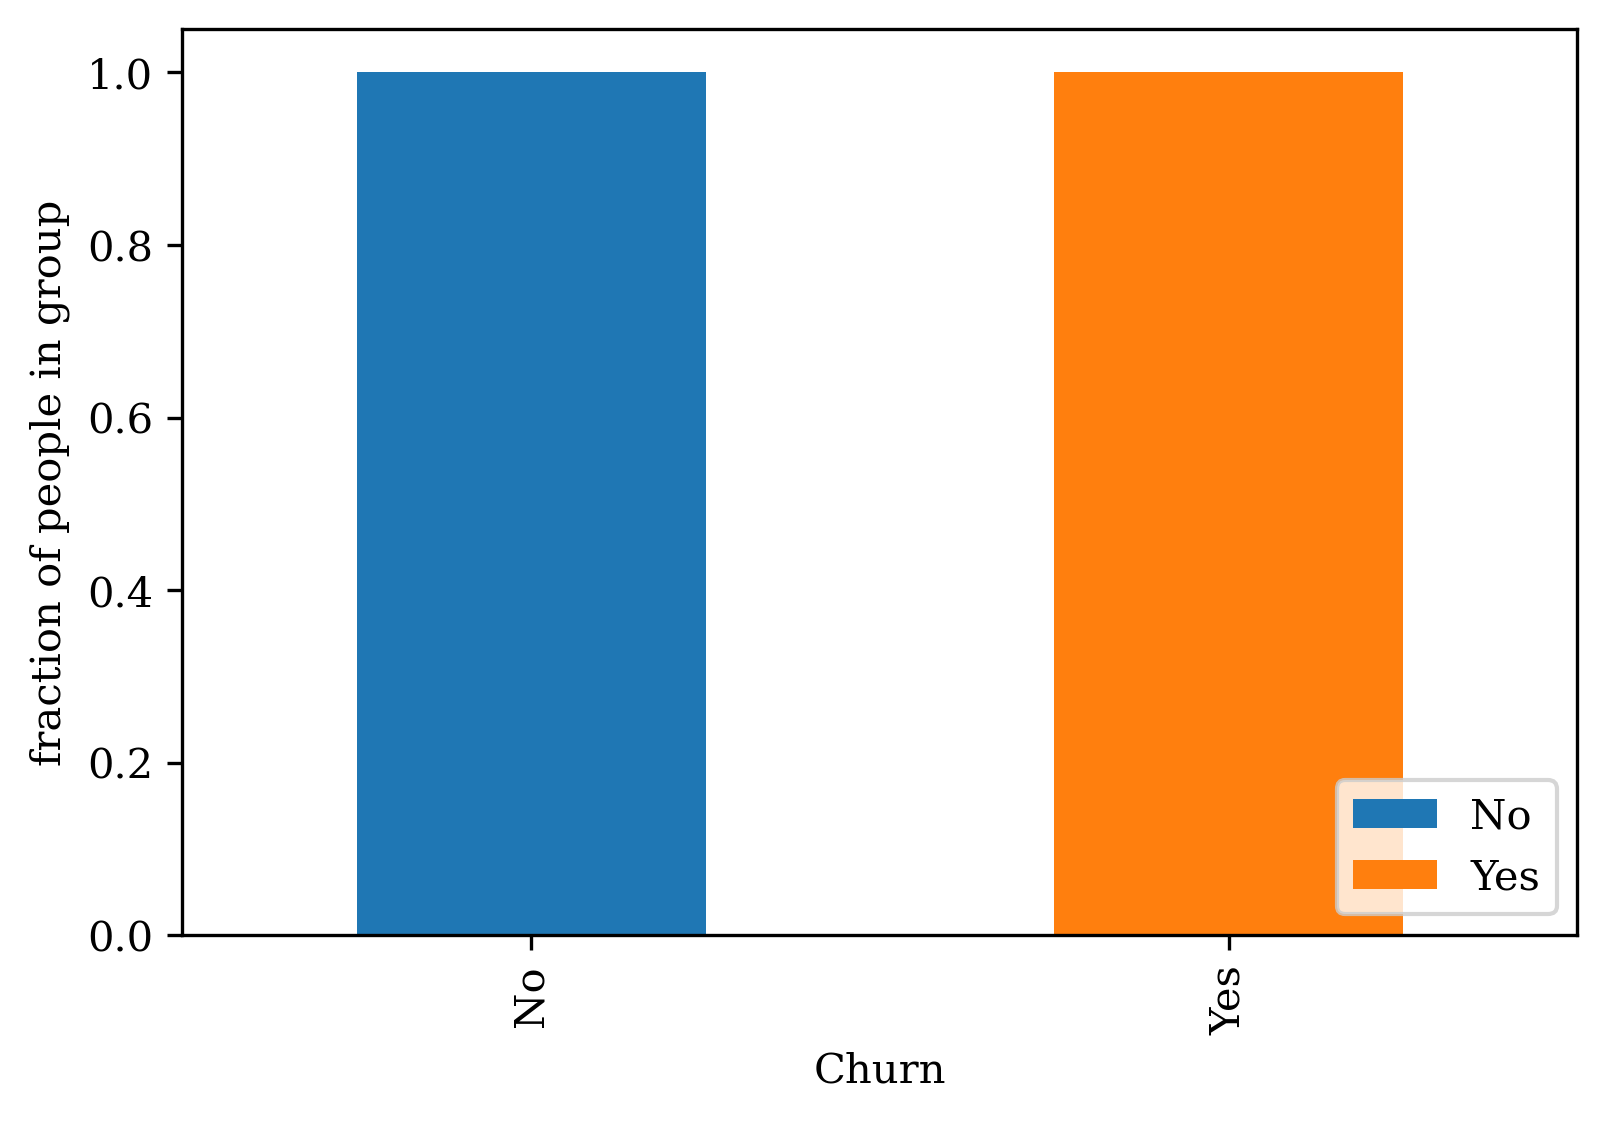

No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


In [213]:
# If the feature is categorical, make bar graph, and print out values counts in percentage and numbers
# If the feature is continuous/ numerical, make box plot, and print out description 

for col in df.columns: 
    
    # categorical vs. continuous 
    if df[col].dtypes == "float64": 
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    
    # categorical vs. categorical 
    elif df[col].dtypes == "object":
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
        
    # categorical vs. cateogrical 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) <= 15):
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
    
    # cateogrical vs. continuous 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) > 15):
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

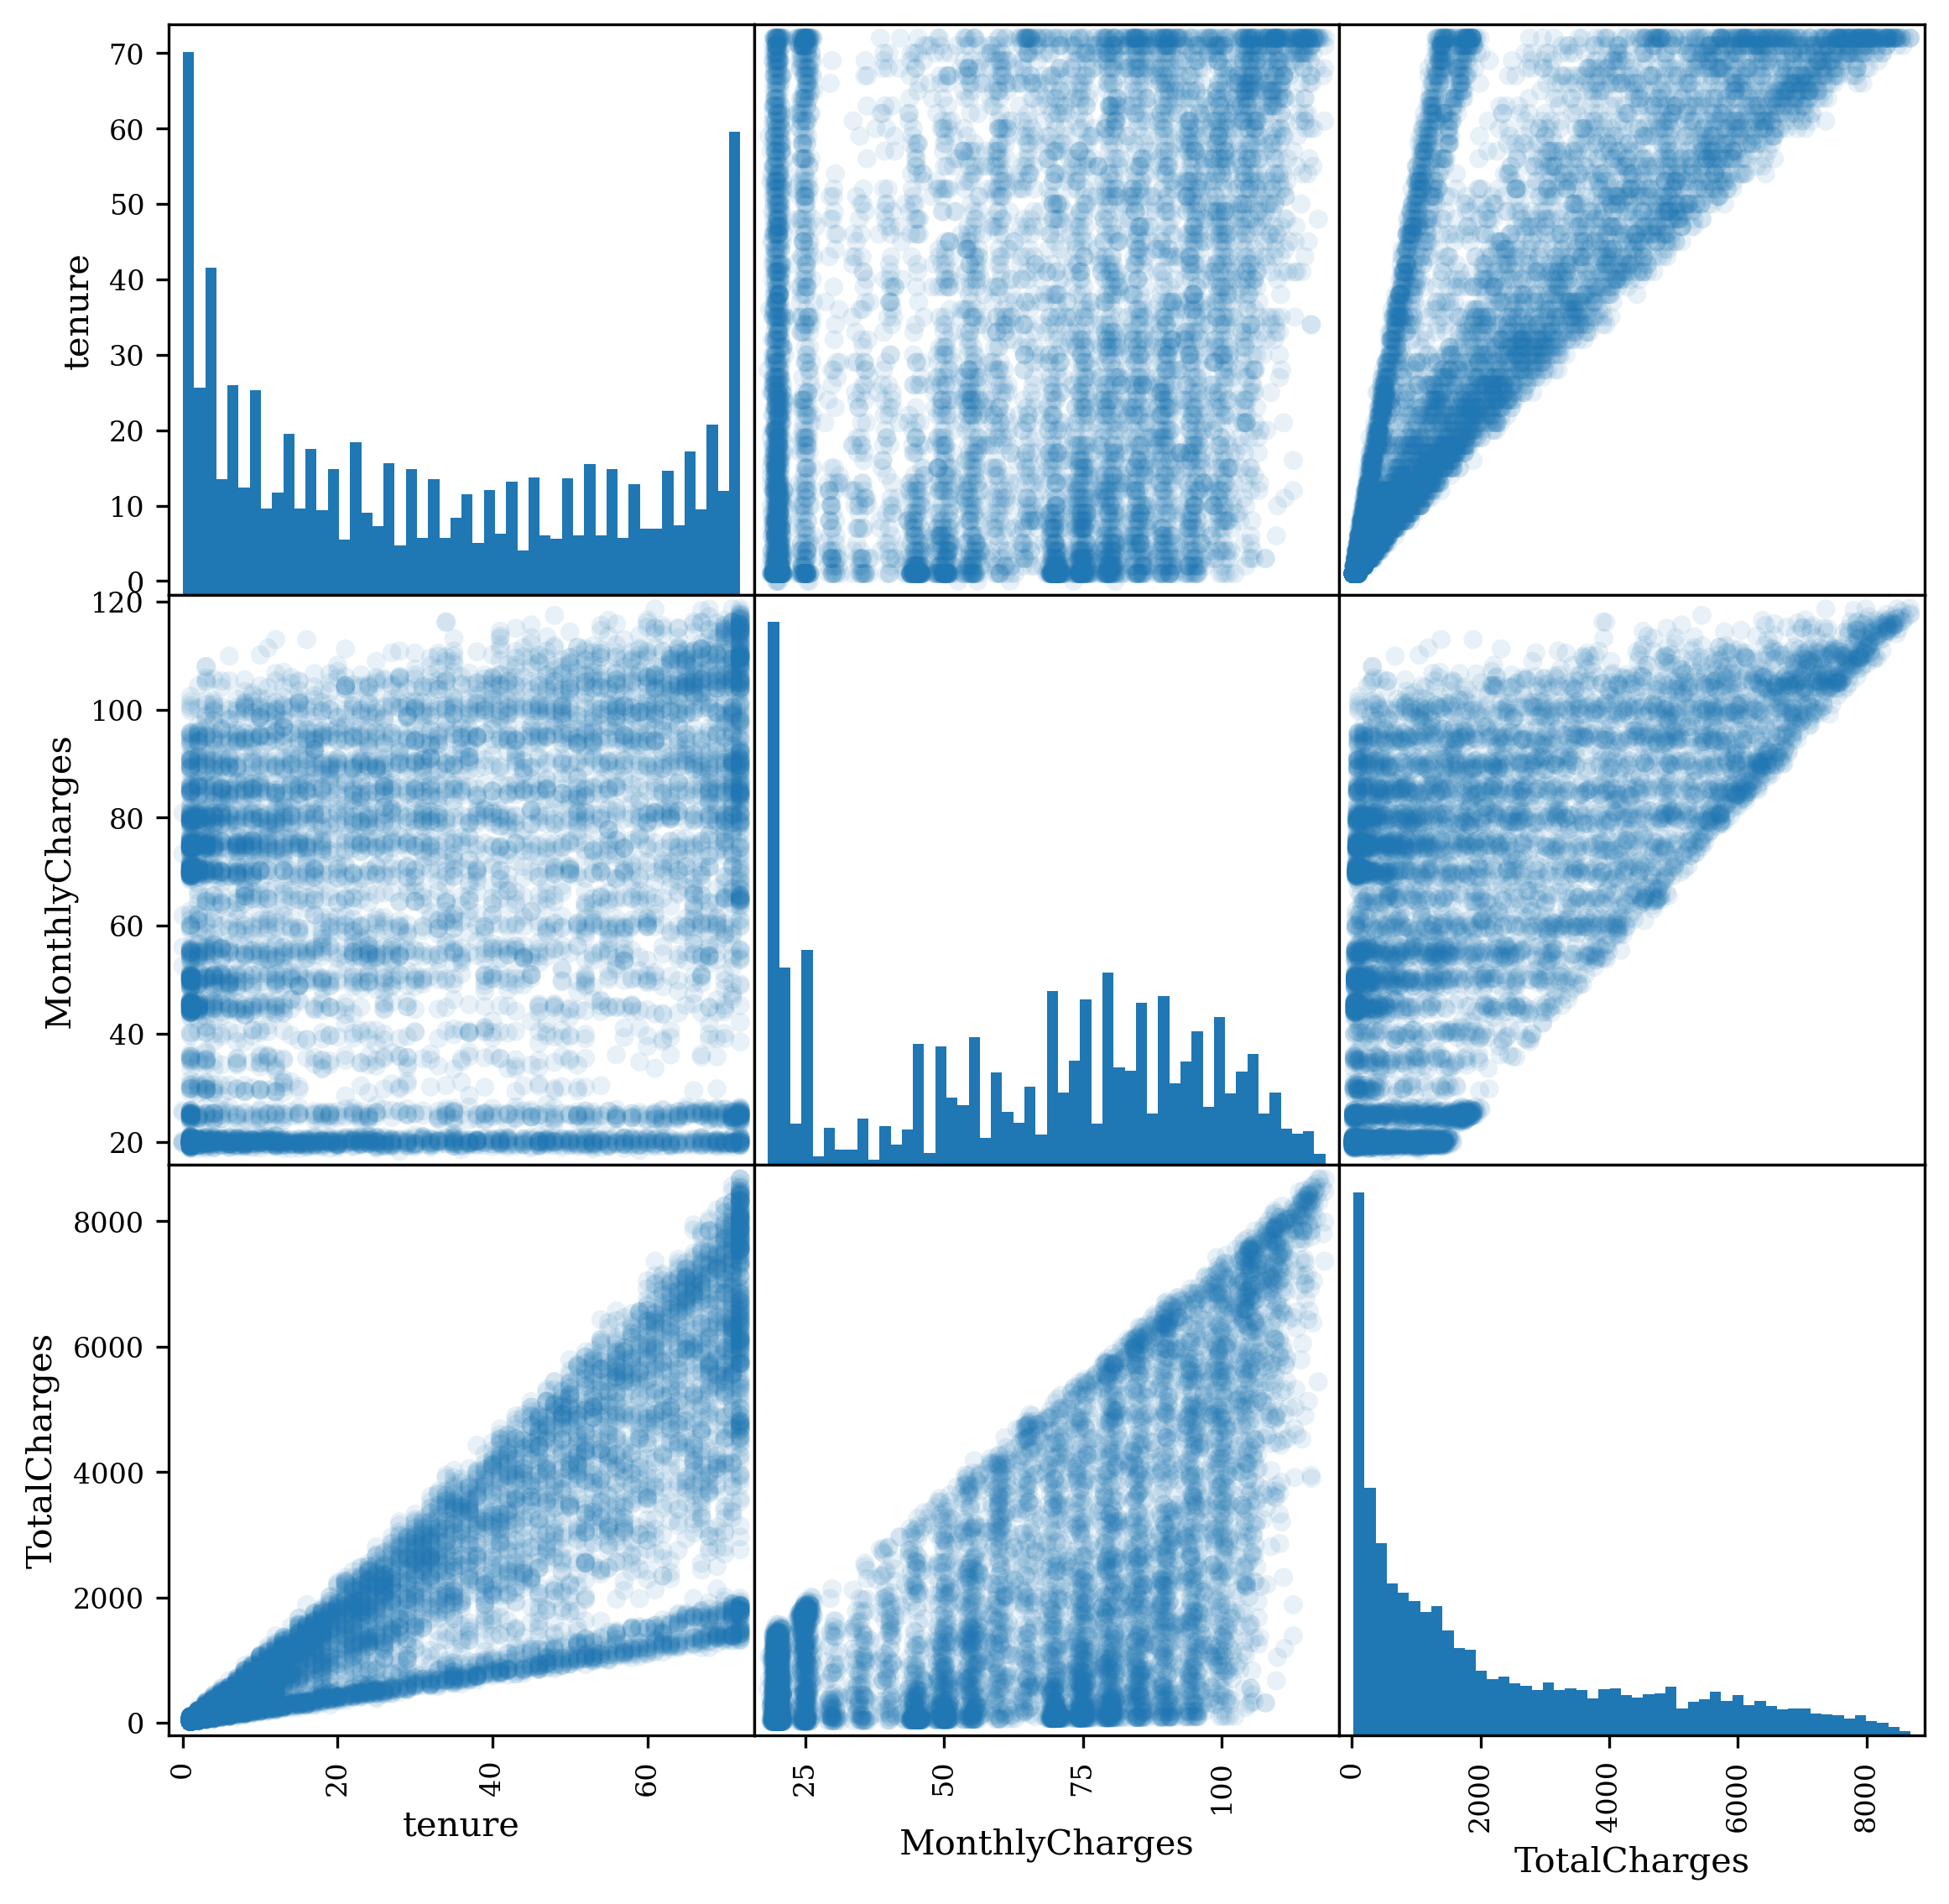

In [215]:
# Only three continuous variables for scatter matrix 

df_continuous = df[['tenure','MonthlyCharges','TotalCharges']]

pd.plotting.scatter_matrix(df_continuous, figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

# Data Splitting and Preprocessing 

## Stratified Splitting

In [88]:
y = df['Churn']
X = df.loc[:, df.columns != 'Churn']

In [257]:
random_state = 42

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

random_state = 42

# stratified train-validation-test split based on User Percentage 
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6, stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, stratify=y_other,random_state=random_state)
        

print('For the features:\n')
print('Test balance:\n','Number of Rows:', X_test.shape[0],'\nNumber of Columns:', X_test.shape[1])
print('\nValidation balance:\n','Number of Rows:', X_val.shape[0],'\nNumber of Columns:', X_val.shape[1])
print('\nTrain balance:\n','Number of Rows:', X_train.shape[0],'\nNumber of Columns:', X_train.shape[1])    
       
    
print('For the outcome variable Churn:\n')
print('Test balance value percetange:\n',y_test.value_counts(normalize=True),'\nNumber of Rows:', y_test.shape[0])
print('\nValidation balance value percetange:\n',y_val.value_counts(normalize=True))
print('\nTrain balance value percetange:\n',y_train.value_counts(normalize=True))

For the features:

Test balance:
 Number of Rows: 1409 
Number of Columns: 19

Validation balance:
 Number of Rows: 1409 
Number of Columns: 19

Train balance:
 Number of Rows: 4225 
Number of Columns: 19
For the outcome variable Churn:

Test balance value percetange:
 No     0.734564
Yes    0.265436
Name: Churn, dtype: float64 
Number of Rows: 1409

Validation balance value percetange:
 No     0.734564
Yes    0.265436
Name: Churn, dtype: float64

Train balance value percetange:
 No     0.734675
Yes    0.265325
Name: Churn, dtype: float64


## Preprocessing: Encoding and Scaling 

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

In [258]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [259]:
# collect which encoder to use on each feature
# needs to be done manually

ordinal_ftrs = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',\
               'OnlineBackup','DeviceProtection','TechSupport',\
               'StreamingTV','StreamingMovies','Contract'] 
ordinal_cats = [['No','Yes'],['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],\
                ['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],\
               ['No internet service','No','Yes'],['No internet service','No','Yes'],['Month-to-month','One year','Two year']]


cat_ftrs = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling','PaymentMethod']


num_ftrs = ['tenure','MonthlyCharges','TotalCharges']


In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [261]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)

# little hacky, but collect feature names

feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_ftrs)) + \
                preprocessor.transformers_[2][-1]

# # you can convert the numpy array back to a data frame with the feature names if you want

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# # transform the CV
df_CV = preprocessor.transform(X_val)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# # transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(4225, 27)
(1409, 27)
(1409, 27)
['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


In [262]:
df_train.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0  1.362657       -0.123490      0.751101            1.0          0.0   
1  1.322050        0.658110      1.381371            1.0          0.0   
2  1.606299       -1.469029     -0.413069            0.0          1.0   
3  1.443871        0.265661      1.160192            0.0          1.0   
4 -0.830123       -0.969399     -0.816192            0.0          1.0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0              1.0              0.0         1.0          0.0            1.0   
1              1.0              0.0         1.0          0.0            1.0   
2              1.0              0.0         0.0          1.0            0.0   
3              1.0              0.0         0.0          1.0            0.0   
4              1.0              0.0         0.0          1.0            0.0   

   ...  PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0  ...           1.0            1.0              1.0             2.0   
1  ...           1.0            1.0              1.0             2.0   
2  ...           1.0            1.0              0.0             0.0   
3  ...           1.0            1.0              1.0             1.0   
4  ...           0.0            0.0              1.0             1.0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0           2.0               2.0          1.0          1.0              1.0   
1           2.0               2.0          2.0          2.0              2.0   
2           0.0               0.0          0.0          0.0              0.0   
3           1.0               2.0          2.0          2.0              2.0   
4           2.0               1.0          2.0          1.0              1.0   

   Contract  
0       2.0  
1       2.0  
2       2.0  
3       2.0  
4       0.0  

[5 rows x 27 columns]

## Missing Values Imputation 

In [264]:
print(df_train.isnull().sum())
print(df_CV.isnull().sum())
print(df_test.isnull().sum())

tenure                                     0
MonthlyCharges                             0
TotalCharges                               7
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PaperlessBilling_No                        0
PaperlessBilling_Yes                       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProt

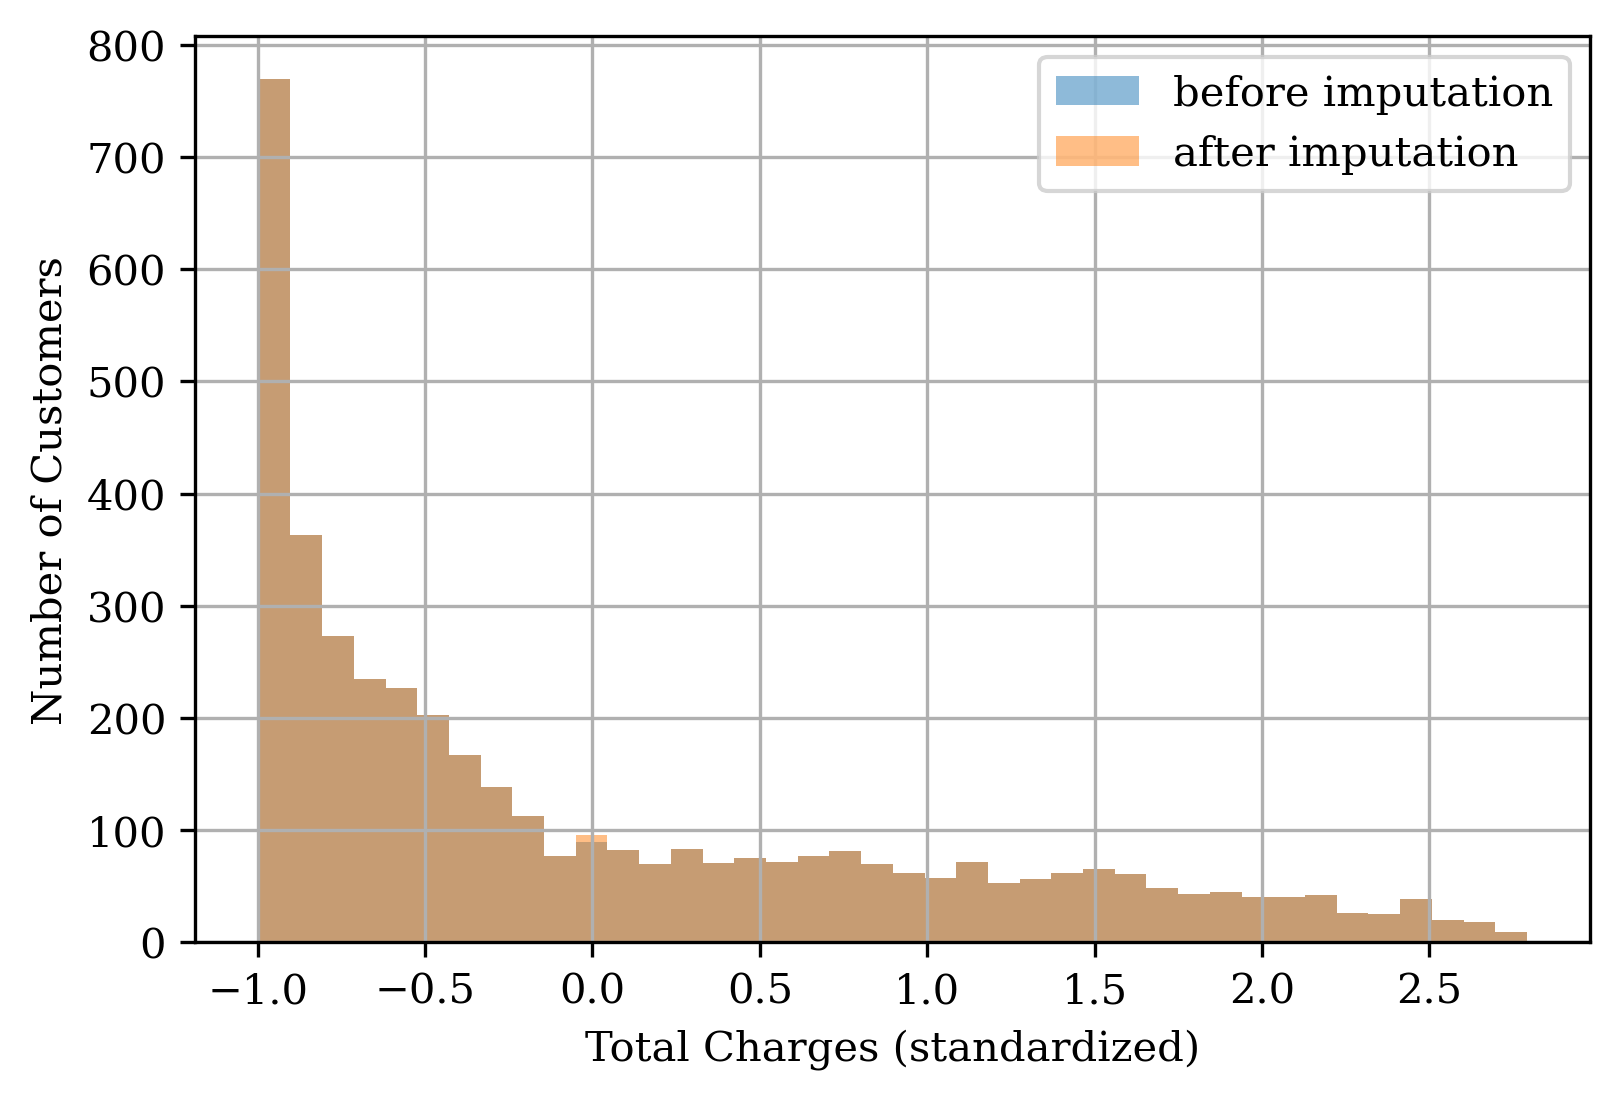

std before imputation: 1.0
std after imputation: 0.9991712542233551


In [265]:
## Only 11 values missing from the total charges column 
## the resulted std after mean imputation does not change that much 

import matplotlib.pyplot as plt

si = SimpleImputer(strategy='mean')
X_totalCharges = si.fit_transform(df_train[['TotalCharges']])

df_train['TotalCharges'].hist(bins=40,label = 'before imputation',alpha=0.5)
plt.hist(X_lot,bins=40,label='after imputation',alpha=0.5)
plt.xlabel('Total Charges (standardized)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

print('std before imputation:',np.std(df_train['TotalCharges']))
print('std after imputation:',np.std(X_totalCharges))

In [266]:
df_train['TotalCharges'] = X_totalCharges

In [267]:
df_CV['TotalCharges'] = si.transform(df_CV[['TotalCharges']])

In [268]:
df_test['TotalCharges'] = si.transform(df_test[['TotalCharges']])

In [270]:
print(df_test.isnull().sum())
print(df_train.isnull().sum())
print(df_CV.isnull().sum())

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PaperlessBilling_No                        0
PaperlessBilling_Yes                       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProt